In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import datetime as dt
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

# TAHAP 1

# LOAD DATA

In [4]:
df = pd.read_excel('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx')

In [5]:
pd.set_option('display.max_columns', None)
df.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral                     4   
1      Sangat_kurang  Jakarta Utara            Website                     4   
2              Bagus  Jakarta Timur             Indeed                     4   
3              Bagus  Jakarta Pusat           LinkedIn                     3   
4              Bagus  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
0                                 0.0                   9.0  +6282232522xxx   
1                                 0.0                   3.0  +6281270745xxx   
2                                 0.0                  11.0  +6281346215xxx   
3                                 4.0                   6.0  +6283233846xxx   
4                                 0.0                  11.0  +6287883263xxx   

                             Email TingkatPendidikan PernahBekerja  \
0   spiritedPorpoise3135@yahoo.com          Magister             1   
1     jealousGelding2239@yahoo.com           Sarjana             1   
2      pluckyMuesli3961@icloud.com          Magister             1   
3  stressedTruffle1406@hotmail.com           Sarjana             1   
4         shyTermite7149@gmail.com           Sarjana             1   

   IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0             1.0  masih_bekerja   1972-07-01    2011-01-10   
1             1.0  toxic_culture   1984-04-26    2014-01-06   
2             1.0      jam_kerja   1974-01-07    2011-01-10   
3             0.0  masih_bekerja   1979-11-24     2014-2-17   
4             0.0    ganti_karir   1974-11-07    2013-11-11   

  TanggalPenilaianKaryawan TanggalResign  
0                2016-2-15             -  
1                2020-1-17     2018-6-16  
2               2016-01-10     2014-9-24  
3               2020-02-04             -  
4                2020-1-22    2018-09-06

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

### Data Description
- Dataset terdiri dari 287 baris dan 25 fitur.
- Dataset terdiri dari 3 tipe data: int64, float64, dan object.
- Fitur TanggalLahir, TanggalHiring, TanggalPenilaianKaryawan, dan TanggalResign akan diubah menjadi tipe data datetime.
- Variabel target yang merupakan AlasanResign adalah data kategorikal dan harus diubah menjadi data numerik.
- Ada empat fitur yang memiliki missing value: **SkorKepuasanPegawai, JumlahKeikutsertaanProjek, JumlahKeterlambatanSebulanTerakhir, JumlahKetidakhadiran, IkutProgramLOP, dan AlasanResign**. 
- Namun pada fitur **TanggalResign** terdapat value '-'. 

In [8]:
df.duplicated().sum()

0

# DATA PREPROCESSING

### Handling Missing Value

In [11]:
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [12]:
null_percentage = (df.isnull().sum()*100)/len(df)
null_percentage[null_percentage!=0].sort_values(ascending=False)

IkutProgramLOP                        89.895470
AlasanResign                          22.996516
JumlahKetidakhadiran                   2.090592
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
dtype: float64

- Fitur IkutProgramLOP akan dihapus karena didominasi oleh missing value, yaitu hampir 90% dari dataset.
- Fitur lainnya akan dilakukan handling missing value.

In [14]:
# Mengecek isi dari fitur AlasanResign
df[df['AlasanResign'].isnull()]['TanggalResign'].value_counts()

TanggalResign
-    66
Name: count, dtype: int64

--> Ada 66 pengguna yang belum resign

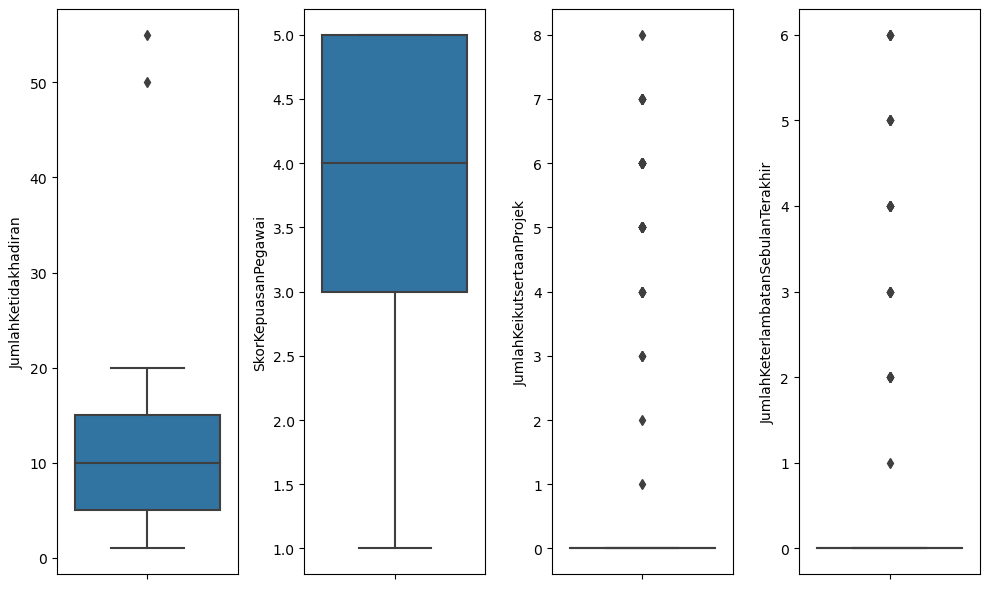

In [16]:
features = ['JumlahKetidakhadiran', 'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek', 
            'JumlahKeterlambatanSebulanTerakhir']
# Membuat boxplot untuk melihat apakah ada outlier
plt.figure(figsize=(10, 6))
for i in range(0, len(features)):
    plt.subplot(1, 4, i+1)
    sns.boxplot(y=df[features[i]])
    plt.tight_layout()

- Untuk feature `IkutProgramLOP` akan dihapus karena memiliki nilai null yang terlalu banyak, yaitu hampir 90%. <br>
- Untuk nilai null pada feature `AlasanResign` akan diganti menjadi **masih_bekerja** karena belum ada nilai pada feature `TanggalResign` yang artinya karyawan tersebut memang belum resign. <br>
- Untuk nilai null pada feature `JumlahKetidakhadiran` akan diisi dengan 0 dimana diasumsikan bahwa nilai null tersebut berarti karyawan belum pernah tidak hadir. Asumsi ini didukung dengan tidak adanya nilai 0 pada feature tersebut.<br>
- Untuk nilai null pada feature `SkorKepuasanPegawai`, `JumlahKeikutsertaanProjek` dan `JumlahKeterlambatanSebulanTerakhir` akan diisi dengan nilai median dari masing-masing kolom karena mengandung outlier.

In [18]:
# Handling Missing Value
df.drop(['IkutProgramLOP'],axis=1,inplace=True)

df['AlasanResign'].fillna('masih_bekerja',inplace=True)
df['JumlahKetidakhadiran'].fillna(0,inplace=True)
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].median(),inplace=True)
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(),inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(),inplace=True)

In [19]:
df.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

### Handling Duplicated Value

In [21]:
df.duplicated().sum()

0

In [22]:
# Akan dicek berdasarkan usernamenya
df['Username'].value_counts().sort_values(ascending=False)

Username
boredEggs0         2
brainyMagpie7      2
jumpyTomatoe4      1
grizzledSnipe7     1
emptyMacaw4        1
                  ..
exactingZebra6     1
pluckyMacaw2       1
spiritedWeaver4    1
affectedPup0       1
puzzledFish5       1
Name: count, Length: 285, dtype: int64

Terdapat dua username yang memiliki duplikat, namun akan dicek lebih lanjut apakah username tersebut benar-benar duplikat atau tidak.

In [24]:
df[df['Username']=='boredEggs0']

Username  EnterpriseID StatusPernikahan JenisKelamin StatusKepegawaian  \
158  boredEggs0        100326         Bercerai       Wanita          FullTime   
204  boredEggs0        106285          Lainnya       Wanita          FullTime   

                         Pekerjaan           JenjangKarir PerformancePegawai  \
158                Product Manager  Freshgraduate_program              Bagus   
204  Software Engineer (Front End)  Freshgraduate_program              Bagus   

        AsalDaerah      HiringPlatform  SkorSurveyEngagement  \
158  Jakarta Timur  Diversity_Job_Fair                     3   
204  Jakarta Timur  Diversity_Job_Fair                     3   

     SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
158                  4.0                        0.0   
204                  3.0                        0.0   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
158                                 0.0                  12.0  +6283854646xxx   
204                                 0.0                  12.0  +6285733263xxx   

                         Email TingkatPendidikan PernahBekerja AlasanResign  \
158  boredEggs0834@outlook.com           Sarjana             1  ganti_karir   
204  boredEggs0225@outlook.com           Sarjana             1    jam_kerja   

    TanggalLahir TanggalHiring TanggalPenilaianKaryawan TanggalResign  
158   1974-01-12    2011-01-10                2017-1-30     2016-3-31  
204   1967-06-03    2013-04-01                2020-2-13     2014-8-19

In [25]:
df[df['Username']=='brainyMagpie7']

Username  EnterpriseID StatusPernikahan JenisKelamin  \
80   brainyMagpie7        106620    Belum_menikah         Pria   
120  brainyMagpie7        101264         Bercerai         Pria   

    StatusKepegawaian                     Pekerjaan           JenjangKarir  \
80           FullTime  Software Engineer (Back End)           Senior_level   
120          FullTime      Product Design (UI & UX)  Freshgraduate_program   

    PerformancePegawai     AsalDaerah HiringPlatform  SkorSurveyEngagement  \
80               Biasa  Jakarta Pusat         Indeed                     2   
120             Kurang  Jakarta Barat         Indeed                     4   

     SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
80                   5.0                        5.0   
120                  3.0                        6.0   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
80                                  0.0                   9.0  +6281267984xxx   
120                                 0.0                  17.0  +6285946196xxx   

                           Email TingkatPendidikan PernahBekerja  \
80    brainyMagpie7048@gmail.com            Doktor             1   
120  brainyMagpie7608@proton.com          Magister             1   

          AlasanResign TanggalLahir TanggalHiring TanggalPenilaianKaryawan  \
80   internal_conflict   1986-09-01     2014-9-29                2020-1-18   
120      masih_bekerja   1970-04-25    2017-02-10                2020-2-25   

    TanggalResign  
80     2019-06-06  
120             -

Kedua username tersebut tidak duplikat. Kedua username yang sama tersebut memiliki identitas yang berbeda, sehingga disimpulkan **tidak ada data yang duplikat**.

### Memisahkan Data Kategorikal dan Numerikal

In [28]:
cats = df.select_dtypes('object').columns.tolist()
nums = df.select_dtypes(exclude='object').columns.tolist()

In [29]:
df[nums].describe()

EnterpriseID  SkorSurveyEngagement  SkorKepuasanPegawai  \
count     287.000000            287.000000           287.000000   
mean   105923.324042              3.101045             3.905923   
std      4044.977599              0.836388             0.905423   
min    100282.000000              1.000000             1.000000   
25%    101269.000000              3.000000             3.000000   
50%    106069.000000              3.000000             4.000000   
75%    110514.500000              4.000000             5.000000   
max    111703.000000              5.000000             5.000000   

       JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
count                 287.000000                          287.000000   
mean                    1.167247                            0.411150   
std                     2.285537                            1.273018   
min                     0.000000                            0.000000   
25%                     0.000000                            0.000000   
50%                     0.000000                            0.000000   
75%                     0.000000                            0.000000   
max                     8.000000                            6.000000   

       JumlahKetidakhadiran  
count            287.000000  
mean              10.229965  
std                6.991709  
min                0.000000  
25%                4.000000  
50%               10.000000  
75%               15.000000  
max               55.000000

In [30]:
df[cats].describe()

Username StatusPernikahan JenisKelamin StatusKepegawaian  \
count          287              287          287               287   
unique         285                5            2                 3   
top     boredEggs0    Belum_menikah       Wanita          FullTime   
freq             2              132          167               217   

                           Pekerjaan           JenjangKarir  \
count                            287                    287   
unique                            14                      3   
top     Software Engineer (Back End)  Freshgraduate_program   
freq                             109                    169   

       PerformancePegawai     AsalDaerah HiringPlatform         NomorHP  \
count                 287            287            287             287   
unique                  5              5              9             287   
top                 Biasa  Jakarta Pusat         Indeed  +6282232522xxx   
freq                   85             72             85               1   

                                 Email TingkatPendidikan  PernahBekerja  \
count                              287               287            287   
unique                             287                 3              2   
top     spiritedPorpoise3135@yahoo.com           Sarjana              1   
freq                                 1               176            286   

         AlasanResign TanggalLahir TanggalHiring TanggalPenilaianKaryawan  \
count             287          287           287                      287   
unique             11          284            97                      127   
top     masih_bekerja   1987-06-14    2011-01-10                2020-1-14   
freq              198            2            12                       17   

       TanggalResign  
count            287  
unique            53  
top                -  
freq             198

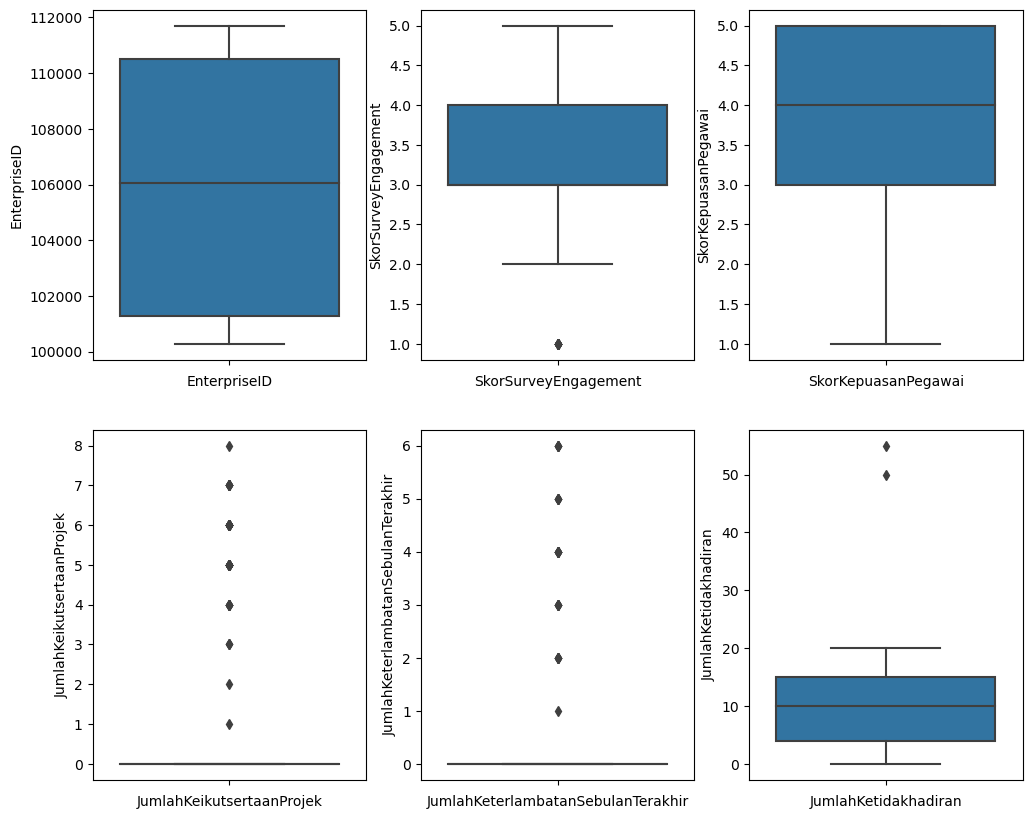

In [31]:
# Boxplot Numerikal
plt.figure(figsize=(12,10))
for i in range(0,len(nums)):
       plt.subplot(2, 3, i+1)
       sns.boxplot(y=df[nums[i]])
       plt.xlabel(nums[i])

- Akan dicek apakah jumlah ketidakhadiran tersebut benar-benar memiliki outlier atau tidak.

In [33]:
df[df['JumlahKetidakhadiran']>20]

Username  EnterpriseID StatusPernikahan JenisKelamin  \
12   yearningBagels0        100895          Menikah         Pria   
115   wingedLeopard7        106436          Lainnya       Wanita   

    StatusKepegawaian                      Pekerjaan           JenjangKarir  \
12           FullTime   Software Engineer (Back End)  Freshgraduate_program   
115          FullTime  Software Engineer (Front End)              Mid_level   

    PerformancePegawai     AsalDaerah HiringPlatform  SkorSurveyEngagement  \
12               Biasa  Jakarta Pusat       LinkedIn                     4   
115              Biasa  Jakarta Pusat  Google_Search                     4   

     SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
12                   3.0                        0.0   
115                  5.0                        0.0   

     JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran         NomorHP  \
12                                  0.0                  50.0  +6287794061xxx   
115                                 0.0                  55.0  +6289913280xxx   

                              Email TingkatPendidikan PernahBekerja  \
12   yearningBagels0311@outlook.com          Magister             1   
115   wingedLeopard7878@hotmail.com           Sarjana             1   

      AlasanResign TanggalLahir TanggalHiring TanggalPenilaianKaryawan  \
12   masih_bekerja   1988-08-10    2013-11-11               2020-01-08   
115  masih_bekerja   1973-01-12    2011-11-28               2020-02-11   

    TanggalResign  
12              -  
115             -

Nilai jumlah ketidakhadiran yang ekstrim pada feature tersebut wajar karena kedua karyawan telah bekerja selama 11 dan 13 tahun lamanya.

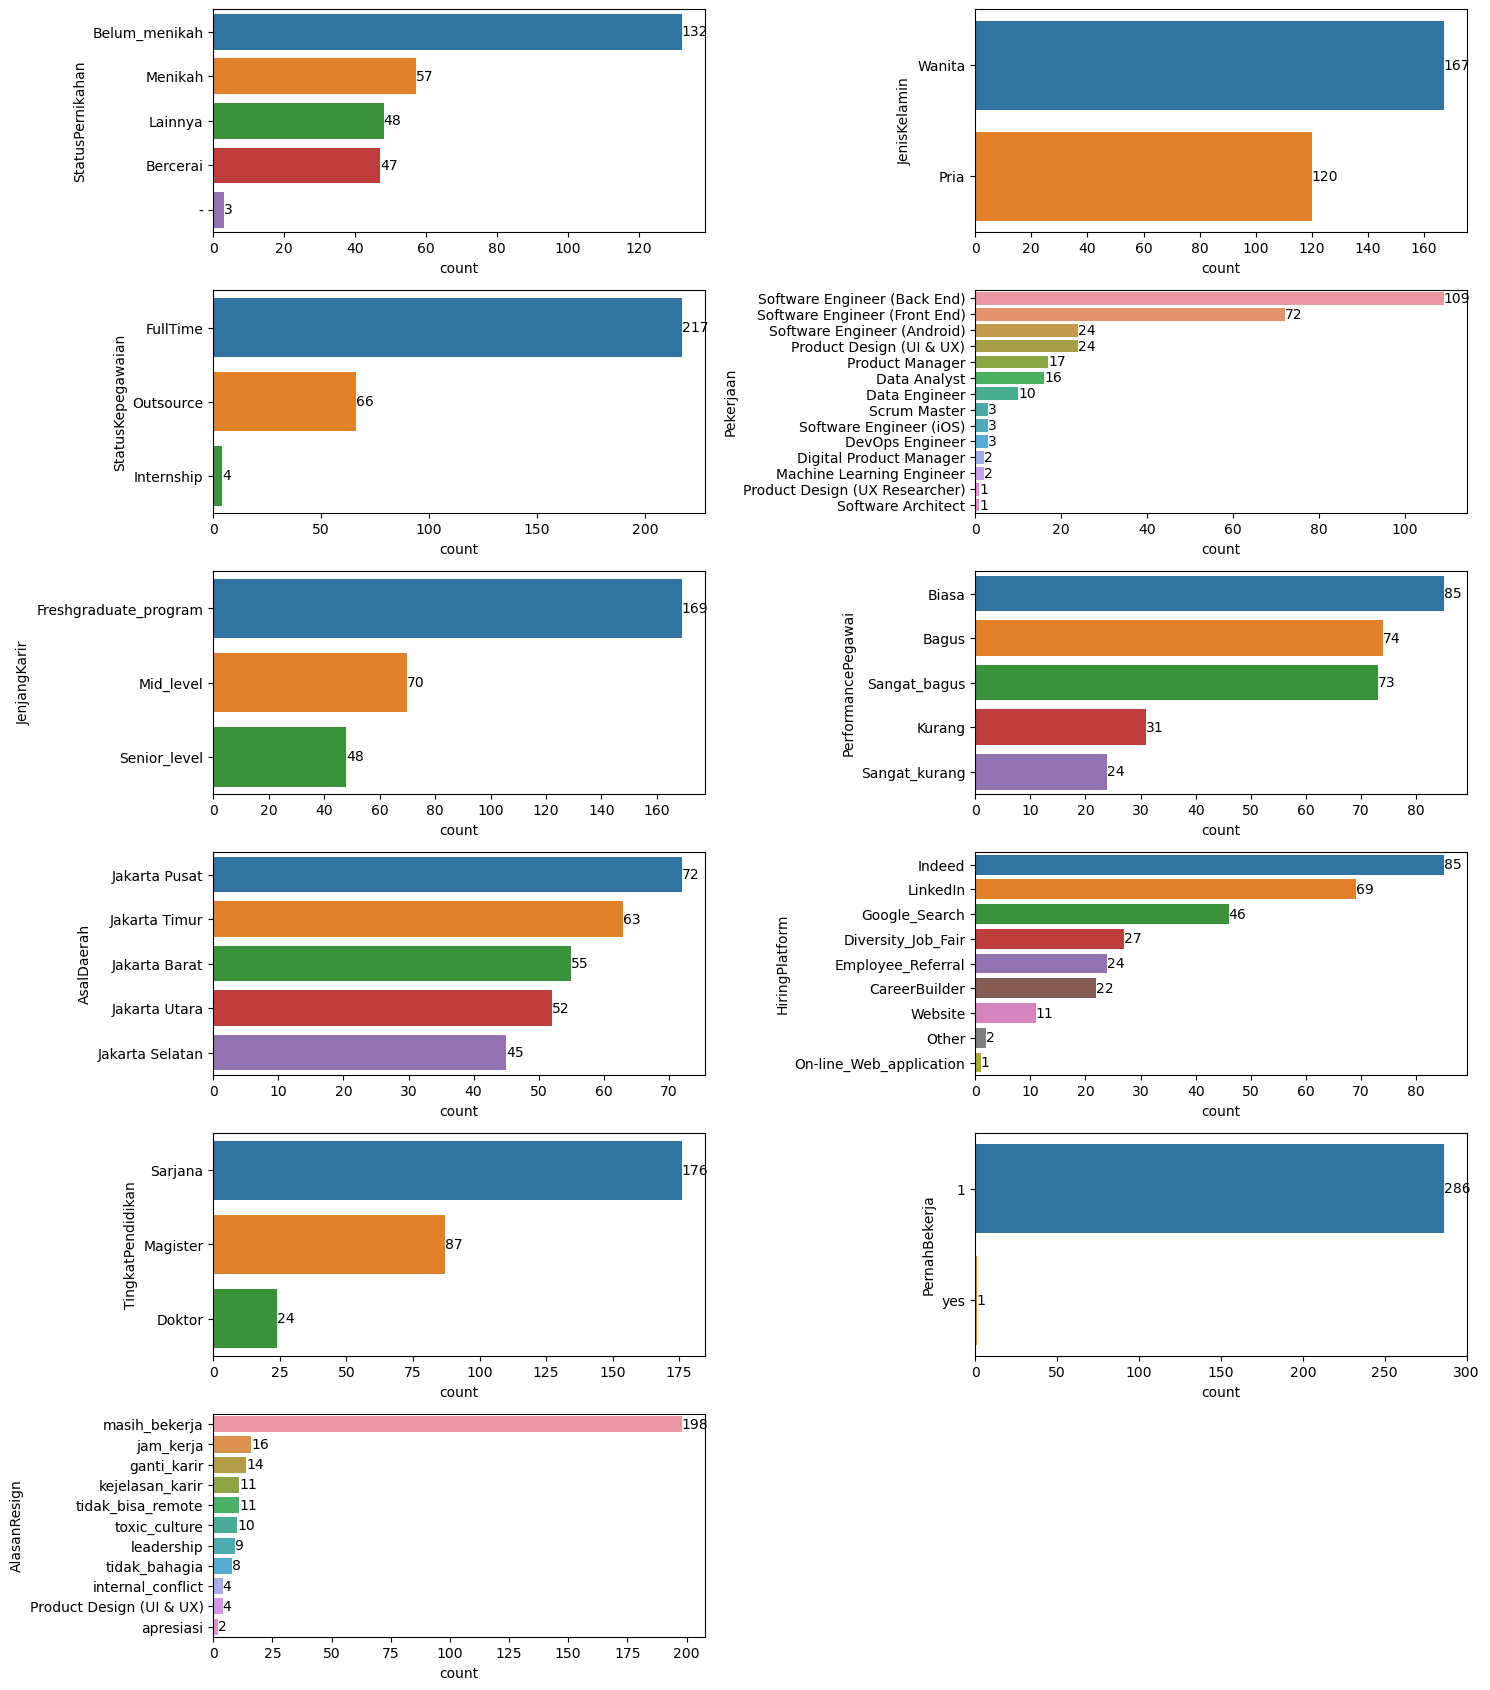

In [35]:
# Individual Countplot (Kategorikal)
features = ['StatusPernikahan', 'JenisKelamin', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 
            'PerformancePegawai', 'AsalDaerah', 'HiringPlatform', 'TingkatPendidikan', 'PernahBekerja', 
            'AlasanResign']
plt.figure(figsize=(15, 25))
for i in range(len(features)):
    plt.subplot(9, 2, i+1)
    ax = sns.countplot(y=features[i], data=df, order=df[features[i]].value_counts().index)
    plt.bar_label(ax.containers[0])
    plt.tight_layout()

- Nilai "-" pada fitur **StatusPernikahan** akan diganti menjadi "Belum_menikah"
- Seluruh nilai pada fitur **PernahBekerja** adalah sama yaitu "1" dan "yes". Fitur ini dapat dihapus saja karena hanya mengandung 1 nilai unique.

### Memilih Fitur yang Relevan

Fitur **NomorHP**, **Email**, dan **EnterpriseID** juga didrop saja karena hanya berperan sebagai identitas user.

In [39]:
# Handling
df['StatusPernikahan'].replace('-','Belum_menikah',inplace=True)

In [40]:
df.drop(['PernahBekerja', 'NomorHP', 'Email', 'EnterpriseID'],axis=1,inplace=True)

# TAHAP 2

### Feature Extraction
Membuat tabel agregat yang menghitung jumlah karyawan yang masuk dan keluar berdasarkan tahun hiring dan tahun resign

In [43]:
# Mengubah value dari row yang belum resign menjadi null agar fitur dapat diconvert ke datetime
df['TanggalResign'].replace('-','NaN',inplace=True)

In [44]:
df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])
df['TanggalResign'] = pd.to_datetime(df['TanggalResign'])

In [45]:
df['TahunResign'] = df['TanggalResign'].dt.year
df['TahunHiring'] = df['TanggalHiring'].dt.year

In [46]:
# Mengetahui Jumlah Resign per Tahun
df_resign = df.groupby(['TahunResign']).agg({'Username':['count']}).reset_index()
df_resign.columns = ['Tahun','Jumlah Resign']
df_resign['Tahun'] = df_resign['Tahun'].astype(int)
df_resign

Tahun  Jumlah Resign
0   2013              5
1   2014             12
2   2015              8
3   2016              8
4   2017             19
5   2018             26
6   2019              5
7   2020              6

In [47]:
# Mengetahui Jumlah Hiring per Tahun
df_hiring = df.groupby(['TahunHiring']).agg({'Username':['count']}).reset_index()
df_hiring.columns = ['Tahun','Jumlah Hiring']
df_hiring['Tahun'] = df_hiring['Tahun'].astype(int)
df_hiring

Tahun  Jumlah Hiring
0    2006              1
1    2007              2
2    2008              2
3    2009              7
4    2010              8
5    2011             76
6    2012             41
7    2013             43
8    2014             56
9    2015             31
10   2016             14
11   2017              5
12   2018              1

In [48]:
# Gabungan (Join) Tabel Jumlah Resign dan Jumlah Hiring
df_group = df_resign.merge(df_hiring, how='outer').sort_values('Tahun',ascending=True).reset_index(drop=True)
df_group.fillna(0,inplace=True)
df_group['Jumlah Resign'] = df_group['Jumlah Resign'].astype(int)
df_group['Jumlah Hiring'] = df_group['Jumlah Hiring'].astype(int)
df_group

Tahun  Jumlah Resign  Jumlah Hiring
0    2006              0              1
1    2007              0              2
2    2008              0              2
3    2009              0              7
4    2010              0              8
5    2011              0             76
6    2012              0             41
7    2013              5             43
8    2014             12             56
9    2015              8             31
10   2016              8             14
11   2017             19              5
12   2018             26              1
13   2019              5              0
14   2020              6              0

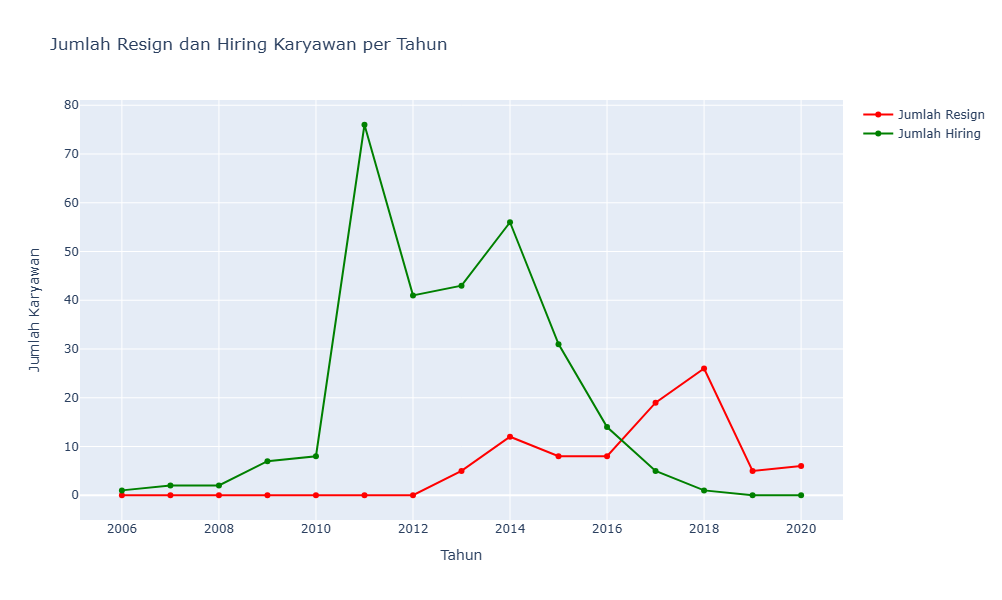

In [49]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_group['Tahun'], y=df_group['Jumlah Resign'], mode='lines+markers', name='Jumlah Resign', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df_group['Tahun'], y=df_group['Jumlah Hiring'], mode='lines+markers', name='Jumlah Hiring', line=dict(color='green')))

fig.update_layout(
    title='Jumlah Resign dan Hiring Karyawan per Tahun',
    xaxis_title='Tahun',
    yaxis_title='Jumlah Karyawan',
    width=1000,
    height=600
)
fig.show()

- Periode 2006-2010: Jumlah karyawan yang di-hiring meningkat secara bertahap dari 1 karyawan pada tahun 2006 hingga 8 karyawan pada tahun 2010. Tidak ada karyawan yang resign selama periode ini. Pada periode ini, perusahaan berada dalam fase pertumbuhan awal dengan penambahan karyawan secara konsisten dan tanpa kehilangan karyawan.
- Periode 2011-2014: Terdapat peningkatan signifikan pada tahun 2011 dengan 76 karyawan baru. Mulai ada karyawan yang resign pada tahun 2013 (5 karyawan) dan meningkat hingga 12 karyawan pada tahun 2014. Perusahaan mengalami ekspansi besar-besaran pada periode ini, terutama pada tahun 2011. Namun, mulai ada tanda-tanda pengunduran diri karyawan, yang bisa menjadi indikasi berbagai hal seperti perubahan manajemen, budaya kerja, atau kondisi pasar.
- Periode 2015-2016: Jumlah karyawan baru yang di-hiring mulai menurun dari 31 pada tahun 2015 menjadi 14 pada tahun 2016. Jumlah karyawan yang resign tetap stabil di angka 8 pada kedua tahun ini. Perusahaan mungkin memasuki fase stabilisasi atau restrukturisasi setelah periode pertumbuhan pesat. Penurunan jumlah hiring bisa menunjukkan upaya pengendalian biaya atau mencapai kapasitas optimal. Jumlah resign yang stabil bisa menunjukkan kondisi kerja yang relatif stabil.
- Periode **2017-2020**: Jumlah karyawan baru yang di-hiring menurun drastis, dengan hanya 5 karyawan di tahun 2017 dan 1 karyawan di tahun 2018, serta tidak ada karyawan baru di tahun 2019 dan 2020. Jumlah karyawan yang resign meningkat signifikan pada tahun 2017 (19 karyawan) dan mencapai puncaknya di tahun 2018 (26 karyawan), kemudian menurun di tahun 2019 (5 karyawan) dan 2020 (6 karyawan). Periode ini menandakan adanya masalah serius dalam perusahaan. Penurunan drastis dalam hiring dan peningkatan jumlah resign menunjukkan **kondisi yang mengkhawatirkan**. Mungkin ada masalah internal seperti ketidakpuasan karyawan, perubahan manajemen, atau kondisi keuangan yang buruk. Penurunan jumlah resign pada tahun 2019 dan 2020 mungkin disebabkan oleh stabilisasi internal atau kurangnya karyawan yang tersisa untuk resign.

In [51]:
# Mengetahui Total Karyawan per Tahun
df_group['Jumlah Karyawan'] = 0
for x in range(1,len(df_group)):
    df_group['Jumlah Karyawan'][0] = df_group['Jumlah Hiring'][0] - df_group['Jumlah Resign'][0]
    df_group['Jumlah Karyawan'][x] = df_group['Jumlah Karyawan'][x-1] + df_group['Jumlah Hiring'][x] - df_group['Jumlah Resign'][x]

In [52]:
df_group

Tahun  Jumlah Resign  Jumlah Hiring  Jumlah Karyawan
0    2006              0              1                1
1    2007              0              2                3
2    2008              0              2                5
3    2009              0              7               12
4    2010              0              8               20
5    2011              0             76               96
6    2012              0             41              137
7    2013              5             43              175
8    2014             12             56              219
9    2015              8             31              242
10   2016              8             14              248
11   2017             19              5              234
12   2018             26              1              209
13   2019              5              0              204
14   2020              6              0              198

In [53]:
import plotly.graph_objects as go

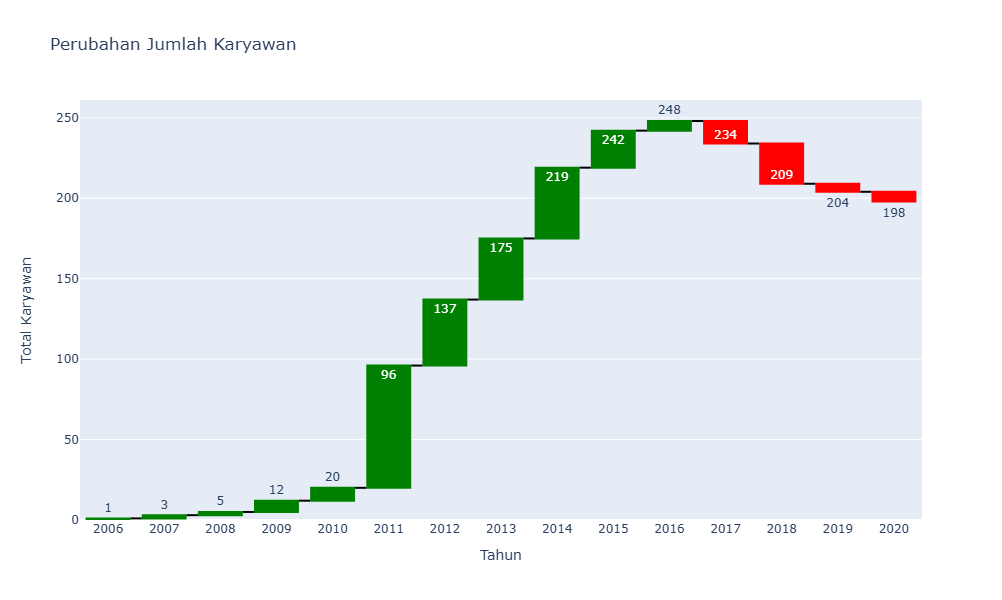

In [54]:
fig = go.Figure(go.Waterfall(
    name = "Employee", orientation = "v", 
    x = df_group['Tahun'],
    textposition = "auto",
    text = df_group['Jumlah Karyawan'],
    y = [(df_group['Jumlah Karyawan'][x] if x==0 else df_group['Jumlah Karyawan'][x] - df_group['Jumlah Karyawan'][x-1]) for x in range(0,len(df_group))],
    connector = {"line":{"color":"black"}},
    increasing = {"marker":{"color":"green"}},
    decreasing = {"marker":{"color":"red"}},
))

fig.update_layout(title='Perubahan Jumlah Karyawan',
                  xaxis=dict(range=[2005.5,2020.5],
                  tickmode = "linear",
                  tick0 = 2006,
                  dtick = 1),
                  yaxis_title='Total Karyawan', 
                  xaxis_title="Tahun",
                  width=900,
                  height=600,
                  hovermode="x unified")


fig.show()

- 2006-2010: Terdapat peningkatan jumlah karyawan secara bertahap dari 1 karyawan di tahun 2006 hingga 20 karyawan di tahun 2010.
- 2011: Terjadi lonjakan besar dalam jumlah karyawan, meningkat menjadi 96 karyawan.
- 2012-2014: Jumlah karyawan terus meningkat dengan lonjakan besar di tahun 2012 dan 2014. Sejak 2006 hingga 2014 perusahaan sedang berkembang dan mungkin mengalami pertumbuhan bisnis yang pesat selama periode ini.
- 2015-2016: Pertumbuhan lebih stabil dengan peningkatan jumlah karyawan yang lebih kecil. Pada periode ini, pertumbuhan jumlah karyawan masih positif, meskipun dengan laju yang lebih lambat. Ini mungkin menunjukkan bahwa perusahaan telah mencapai titik stabil di mana ekspansi tidak secepat sebelumnya tetapi masih dalam kondisi yang baik.
- 2017-2020: Terjadi penurunan jumlah karyawan secara bertahap, dengan penurunan terbesar pada tahun 2017 dan 2018. Penurunan jumlah karyawan selama periode ini bisa menjadi tanda kekhawatiran. Alasan penurunan perlu dianalisis lebih lanjut, apakah disebabkan oleh faktor internal seperti restrukturisasi atau efisiensi, atau faktor eksternal seperti kondisi pasar yang menurun atau persaingan yang meningkat.

# TAHAP 3

### DataFrame Karyawan Resign Berdasarkan Pekerjaan

In [58]:
df_resign = df[df['AlasanResign']!='masih_bekerja']
df_pekerjaan_resign = df_resign.groupby('Pekerjaan').agg({'Username':'count'}).reset_index()
df_pekerjaan_resign.columns = ['Pekerjaan','Jumlah Karyawan Resign']
df_pekerjaan_resign

Pekerjaan  Jumlah Karyawan Resign
0                   Data Analyst                       8
1                  Data Engineer                       3
2       Product Design (UI & UX)                       9
3                Product Manager                       6
4    Software Engineer (Android)                       7
5   Software Engineer (Back End)                      28
6  Software Engineer (Front End)                      28

### DataFrame Karyawan Masih Bekerja Berdasarkan Pekerjaan

In [60]:
df_stay = df[df['AlasanResign']=='masih_bekerja']
df_stay_current = df_stay.groupby('Pekerjaan').agg({'Username':'count'}).reset_index()
df_stay_current.columns = ['Pekerjaan','Jumlah Karyawan Saat Ini']
df_stay_current

Pekerjaan  Jumlah Karyawan Saat Ini
0                     Data Analyst                         8
1                    Data Engineer                         7
2                  DevOps Engineer                         3
3          Digital Product Manager                         2
4        Machine Learning Engineer                         2
5         Product Design (UI & UX)                        15
6   Product Design (UX Researcher)                         1
7                  Product Manager                        11
8                     Scrum Master                         3
9               Software Architect                         1
10     Software Engineer (Android)                        17
11    Software Engineer (Back End)                        81
12   Software Engineer (Front End)                        44
13         Software Engineer (iOS)                         3

### DataFrame Karyawan Yang Resign dan Masih Bekerja Berdasarkan Pekerjaan

In [62]:
df_group_pekerjaan = df_pekerjaan_resign.merge(df_stay_current, how='outer').sort_values('Pekerjaan',ascending=True).reset_index(drop=True)
df_group_pekerjaan.fillna(0,inplace=True)
df_group_pekerjaan['Jumlah Karyawan Resign'] = df_group_pekerjaan['Jumlah Karyawan Resign'].astype(int)
df_group_pekerjaan

Pekerjaan  Jumlah Karyawan Resign  \
0                     Data Analyst                       8   
1                    Data Engineer                       3   
2                  DevOps Engineer                       0   
3          Digital Product Manager                       0   
4        Machine Learning Engineer                       0   
5         Product Design (UI & UX)                       9   
6   Product Design (UX Researcher)                       0   
7                  Product Manager                       6   
8                     Scrum Master                       0   
9               Software Architect                       0   
10     Software Engineer (Android)                       7   
11    Software Engineer (Back End)                      28   
12   Software Engineer (Front End)                      28   
13         Software Engineer (iOS)                       0   

    Jumlah Karyawan Saat Ini  
0                          8  
1                          7  
2                          3  
3                          2  
4                          2  
5                         15  
6                          1  
7                         11  
8                          3  
9                          1  
10                        17  
11                        81  
12                        44  
13                         3

### Menambahkan Kolom Baru

In [64]:
df_group_pekerjaan['Jumlah Karyawan'] = df_group_pekerjaan['Jumlah Karyawan Resign'] + df_group_pekerjaan['Jumlah Karyawan Saat Ini']
df_group_pekerjaan['Persentase Karyawan Saat Ini'] = df_group_pekerjaan['Jumlah Karyawan Saat Ini']/df_group_pekerjaan['Jumlah Karyawan']*100
df_group_pekerjaan['Persentase Karyawan Saat Ini'] = round(df_group_pekerjaan['Persentase Karyawan Saat Ini'],1)
df_group_pekerjaan.sort_values(['Jumlah Karyawan'],ascending=False)

Pekerjaan  Jumlah Karyawan Resign  \
11    Software Engineer (Back End)                      28   
12   Software Engineer (Front End)                      28   
5         Product Design (UI & UX)                       9   
10     Software Engineer (Android)                       7   
7                  Product Manager                       6   
0                     Data Analyst                       8   
1                    Data Engineer                       3   
2                  DevOps Engineer                       0   
8                     Scrum Master                       0   
13         Software Engineer (iOS)                       0   
3          Digital Product Manager                       0   
4        Machine Learning Engineer                       0   
6   Product Design (UX Researcher)                       0   
9               Software Architect                       0   

    Jumlah Karyawan Saat Ini  Jumlah Karyawan  Persentase Karyawan Saat Ini  
11                        81              109                          74.3  
12                        44               72                          61.1  
5                         15               24                          62.5  
10                        17               24                          70.8  
7                         11               17                          64.7  
0                          8               16                          50.0  
1                          7               10                          70.0  
2                          3                3                         100.0  
8                          3                3                         100.0  
13                         3                3                         100.0  
3                          2                2                         100.0  
4                          2                2                         100.0  
6                          1                1                         100.0  
9                          1                1                         100.0

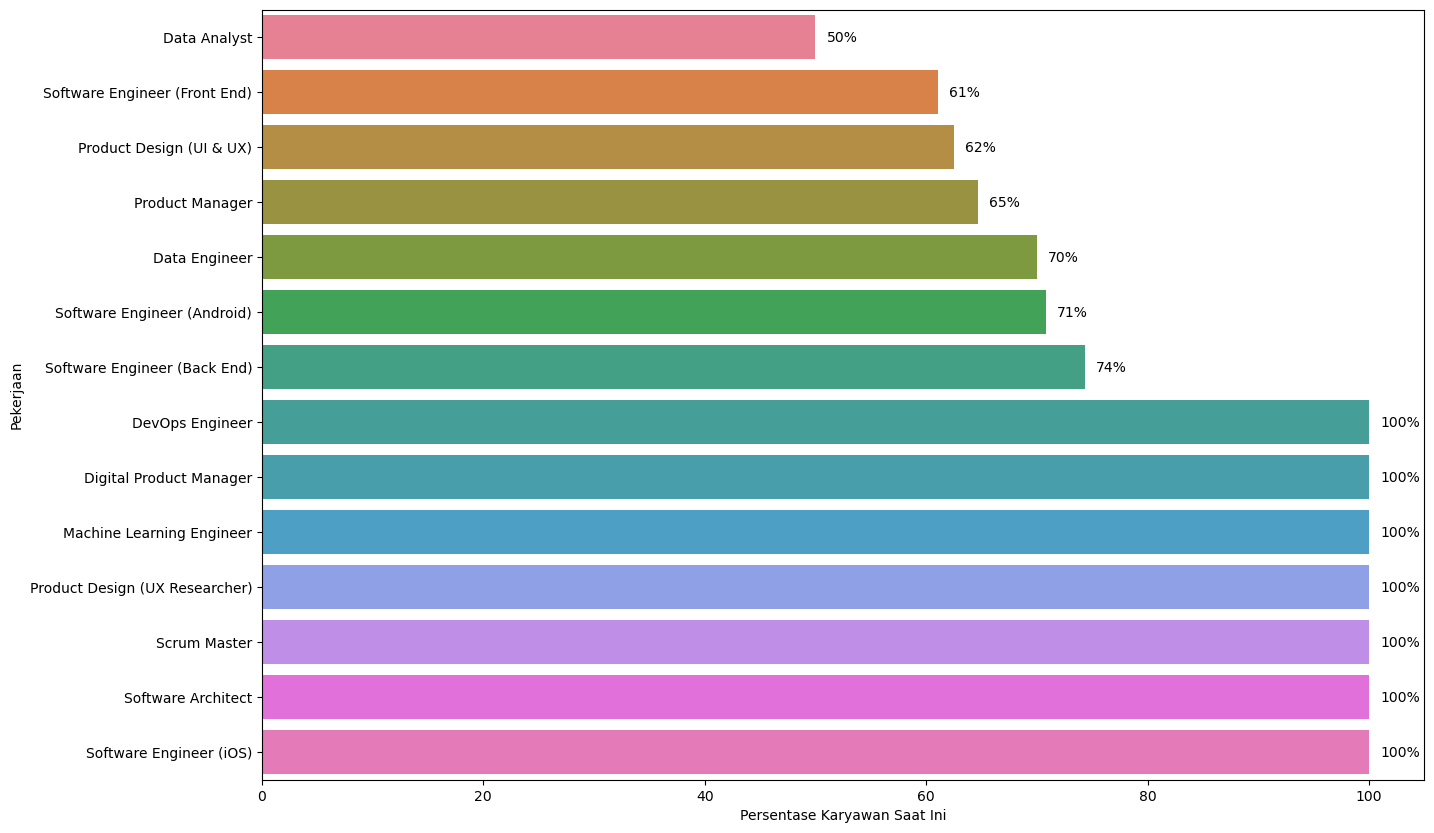

In [65]:
plt.figure(figsize=(15,10))
palette = sns.color_palette("husl", len(df_group_pekerjaan)) 

ax = sns.barplot(y='Pekerjaan', x='Persentase Karyawan Saat Ini', 
                 data=df_group_pekerjaan.sort_values('Persentase Karyawan Saat Ini'), 
                 palette=palette)

for i in ax.patches:
    width = i.get_width() 
    ax.text(width + 1,       
            i.get_y() + i.get_height() / 2,
            '{:1.0f}%'.format(width), 
            ha = 'left',   
            va = 'center') 

plt.show()

Pekerjaan **Data Analyst** memiliki persentase employee retention paling rendah yaitu 50%.

### Tingkat Resign Tertinggi 

In [68]:
# Identifikasi divisi dengan tingkat resign tertinggi
df_group_pekerjaan['Persentase Resign'] = (df_group_pekerjaan['Jumlah Karyawan Resign'] / df_group_pekerjaan['Jumlah Karyawan']) * 100
highest_resign_division = df_group_pekerjaan.loc[df_group_pekerjaan['Persentase Resign'].idxmax()]

print("Divisi dengan tingkat resign tertinggi:")
print(highest_resign_division)

Divisi dengan tingkat resign tertinggi:
Pekerjaan                       Data Analyst
Jumlah Karyawan Resign                     8
Jumlah Karyawan Saat Ini                   8
Jumlah Karyawan                           16
Persentase Karyawan Saat Ini            50.0
Persentase Resign                       50.0
Name: 0, dtype: object


**Data Analyst** adalah pekerjaan/divisi yang memiliki tingkat resign tertinggi.

### Jumlah employee yang resign berdasarkan Jenjang Karir

In [71]:
df_DA = df[df['Pekerjaan']=='Data Analyst']

def resign(x):
  if x == 'masih_bekerja':
    return 'Masih Bekerja'
  else:
    return 'Resign'

df_DA['Resign'] = df_DA.apply(lambda x: resign(x['AlasanResign']),axis=1)
df_DA['Resign'].value_counts()

Resign
Resign           8
Masih Bekerja    8
Name: count, dtype: int64

In [72]:
df_da_jenjangkarir = df_DA.groupby(['JenjangKarir','Resign']).agg({'Username':'count'}).reset_index()
df_da_jenjangkarir.columns = ['Jenjang Karir','Status','Jumlah Karyawan']
df_da_jenjangkarir

Jenjang Karir         Status  Jumlah Karyawan
0  Freshgraduate_program  Masih Bekerja                2
1  Freshgraduate_program         Resign                8
2              Mid_level  Masih Bekerja                6

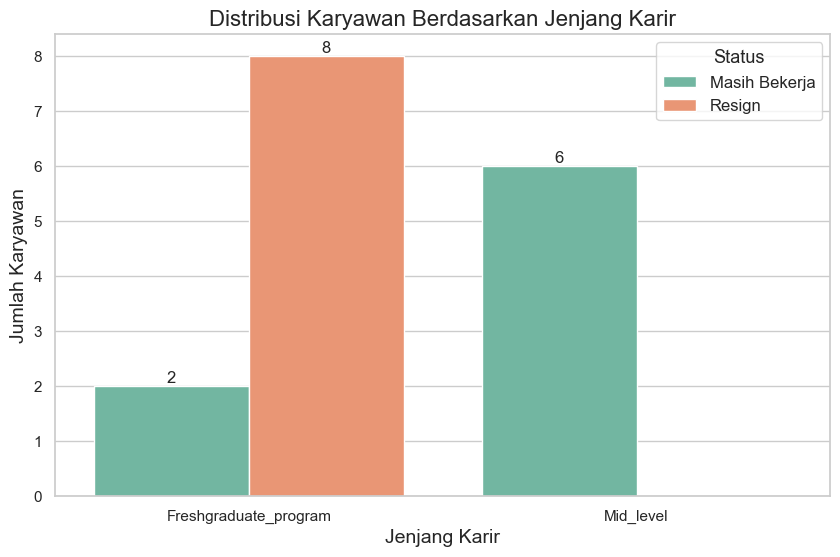

In [73]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid") 

ax = sns.barplot(x='Jenjang Karir', y='Jumlah Karyawan', hue='Status', data=df_da_jenjangkarir, palette='Set2')

plt.title('Distribusi Karyawan Berdasarkan Jenjang Karir', fontsize=16)
plt.xlabel('Jenjang Karir', fontsize=14)
plt.ylabel('Jumlah Karyawan', fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)
plt.legend(title='Status', title_fontsize='13', fontsize='12', loc='upper right')

plt.show()

**Interpretasi**
1. **Freshgraduate Program**
Tingkat resign yang sangat tinggi di program ini menunjukkan bahwa banyak karyawan fresh graduate yang meninggalkan perusahaan. Ini bisa disebabkan oleh beberapa faktor seperti ekspektasi yang tidak terpenuhi, kurangnya peluang pengembangan karir, atau ketidakpuasan dengan budaya kerja.

2. **Mid Level**
Jumlah karyawan yang masih bekerja di tingkat mid-level relatif tinggi. Ini bisa menunjukkan bahwa karyawan di level ini merasa lebih puas dengan kondisi kerja mereka, atau mungkin mereka melihat peluang karir yang lebih baik dibandingkan dengan fresh graduates.

**Rekomendasi** <brInterpretasi

Freshgraduate Program Tingkat resign yang sangat tinggi di program ini menunjukkan bahwa banyak karyawan fresh graduate yang meninggalkan perusahaan. Ini bisa disebabkan oleh beberapa faktor seperti ekspektasi yang tidak terpenuhi, kurangnya peluang pengembangan karir, atau ketidakpuasan dengan budaya kerja.

Mid Level Jumlah karyawan yang masih bekerja di tingkat mid-level relatif tinggi. Ini bisa menunjukkan bahwa karyawan di level ini merasa lebih puas dengan kondisi kerja mereka, atau mungkin mereka melihat peluang karir yang lebih baik dibandingkan dengan fresh graduates.>
Untuk mengurangi tingkat resign yang tinggi pada program freshgraduate dan meningkatkan retensi karyawan, manajemen dapat mempertimbangkan langkah-langkah berikut:
1. Tinjau kembali program onboarding dan pelatihan untuk fresh graduates untuk memastikan bahwa mereka diberikan sumber daya dan dukungan yang diperlukan untuk sukses di peran mereka.
2. Meningkatkan komunikasi antara manajemen dan karyawan fresh graduate untuk memahami kebutuhan dan kekhawatiran mereka. Ini bisa dilakukan melalui survei rutin atau sesi umpan balik.
3. Menerapkan program pengembangan karir dan mentorship yang lebih baik. Mentor yang berpengalaman dapat membantu fresh graduates menavigasi lingkungan kerja dan mengembangkan keterampilan yang diperlukan.
4. Menawarkan insentif dan penghargaan untuk karyawan yang menunjukkan kinerja baik. Ini bisa berupa bonus, penghargaan, atau peluang pengembangan profesional.
5. Menciptakan budaya kerja yang positif dan inklusif di mana karyawan merasa dihargai dan didukung.
6. Memberikan peluang rotasi kerja sehingga karyawan dapat merasakan berbagai aspek pekerjaan dan menemukan bidang yang paling sesuai dengan minat dan keterampilan mereka.
7. Tinjau dan sesuaikan skala gaji untuk memastikan bahwa kompensasi yang ditawarkan kompetitif dengan pasar. Ini penting untuk menarik dan mempertahankan talenta terbaik.

### Jumlah employee yang resign berdasarkan Performa Karyawan

In [76]:
df_da_performa = df_DA.groupby(['PerformancePegawai','Resign']).agg({'Username':'count'}).reset_index()
df_da_performa.columns = ['Performa Karyawan','Status','Jumlah Karyawan']
df_da_performa

Performa Karyawan         Status  Jumlah Karyawan
0             Bagus  Masih Bekerja                2
1             Bagus         Resign                1
2             Biasa  Masih Bekerja                1
3             Biasa         Resign                2
4            Kurang  Masih Bekerja                1
5      Sangat_bagus  Masih Bekerja                4
6      Sangat_bagus         Resign                4
7     Sangat_kurang         Resign                1

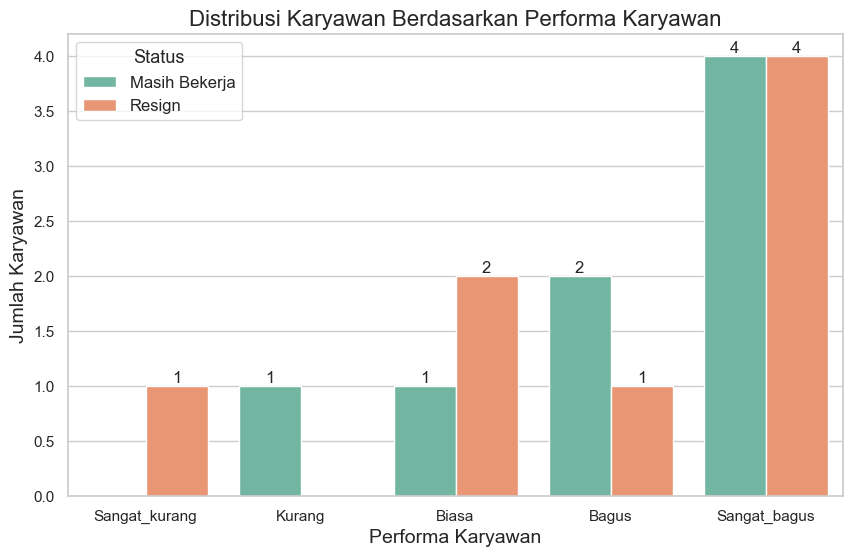

In [77]:
categories = ['Sangat_kurang', 'Kurang', 'Biasa', 'Bagus', 'Sangat_bagus']
df_da_performa['Performa Karyawan'] = pd.Categorical(df_da_performa['Performa Karyawan'], categories=categories, ordered=True)

plt.figure(figsize=(10,6))
sns.set(style="whitegrid") 

ax = sns.barplot(x='Performa Karyawan', y='Jumlah Karyawan', hue='Status', data=df_da_performa, palette='Set2')
plt.title('Distribusi Karyawan Berdasarkan Performa Karyawan', fontsize=16)
plt.xlabel('Performa Karyawan', fontsize=14)
plt.ylabel('Jumlah Karyawan', fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)

plt.legend(title='Status', title_fontsize='13', fontsize='12', loc='upper left')
plt.show()

**Interpretasi**
- Jumlah karyawan dengan performa "Sangat Bagus" yang masih bekerja dan yang resign sama-sama tinggi, yaitu 4 orang.
- Jumlah karyawan dengan performa "Bagus" yang masih bekerja lebih banyak daripada yang resign, dengan perbandingan 2 berbanding 1.
- Jumlah karyawan dengan performa "Biasa" yang masih bekerja lebih sedikit daripada yang resign, dengan perbandingan 1 berbanding 2.
- Jumlah karyawan dengan performa "Kurang" yang masih bekerja adalah 1 orang, sementara tidak ada yang resign.
- Jumlah karyawan dengan performa "Sangat Kurang" yang resign adalah 1 orang, sementara tidak ada yang masih bekerja.

**Rekomendasi**
1. Karyawan dengan performa "Sangat Bagus" memiliki jumlah yang sama antara yang masih bekerja dan yang resign. Manajemen perlu mengidentifikasi alasan mengapa karyawan berperforma tinggi ini resign. Fokus pada meningkatkan kepuasan kerja mereka melalui insentif, kesempatan pengembangan karir, dan lingkungan kerja yang kondusif.
2. Karyawan dengan performa "Biasa" menunjukkan jumlah resign yang lebih tinggi daripada performa "Bagus". Evaluasi kondisi kerja mereka dan tawarkan dukungan atau pelatihan yang dapat membantu mereka meningkatkan performa dan merasa lebih dihargai di perusahaan.
3. Meskipun jumlah karyawan dengan performa "Kurang" dan "Sangat Kurang" yang masih bekerja tidak tinggi, penting untuk memahami dan menangani penyebab kinerja rendah. Berikan pelatihan tambahan atau peluang untuk pindah ke posisi yang mungkin lebih sesuai dengan keahlian mereka.
4. Perusahaan dapat mempertimbangkan untuk mengimplementasikan program pengembangan karir yang terstruktur untuk semua tingkat performa. Program ini bisa meliputi pelatihan, mentoring, dan jalur promosi yang jelas.
5. Rutin melakukan survei kepuasan karyawan untuk memahami kebutuhan dan kekhawatiran mereka. Gunakan data ini untuk membuat perubahan yang dapat meningkatkan retensi dan kepuasan kerja.
6. Membuat budaya kerja yang mendukung komunikasi terbuka antara manajemen dan karyawan sehingga karyawan merasa nyaman untuk menyampaikan masukan dan keluhan mereka.

### Jumlah employee yang resign berdasarkan Alasan Resign

In [80]:
df_da_alasan_resign = df_DA.groupby(['AlasanResign','Resign']).agg({'Username':'count'}).reset_index()
df_da_alasan_resign.columns = ['Alasan Resign','Status','Jumlah Karyawan']
df_da_alasan_resign

Alasan Resign         Status  Jumlah Karyawan
0  internal_conflict         Resign                2
1      masih_bekerja  Masih Bekerja                8
2      toxic_culture         Resign                6

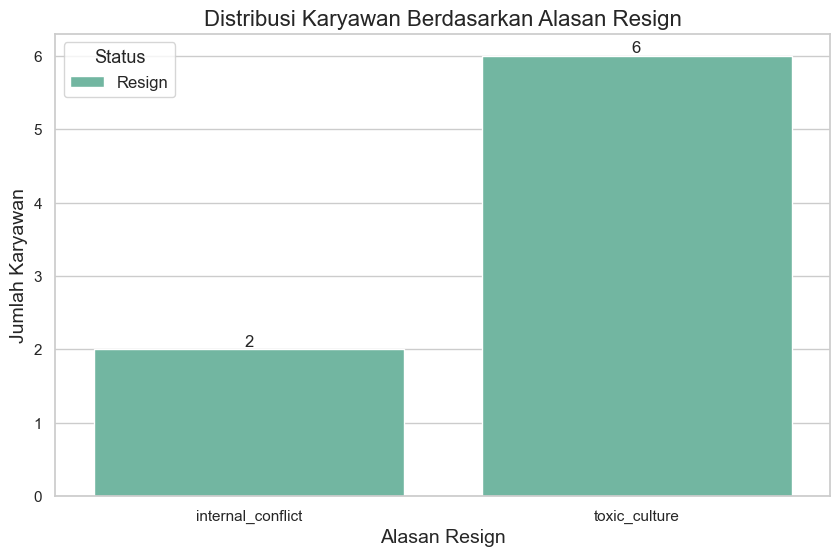

In [81]:
plt.figure(figsize=(10,6))
sns.set(style="whitegrid") 

ax = sns.barplot(x='Alasan Resign', y='Jumlah Karyawan', hue='Status', data=df_da_alasan_resign[df_da_alasan_resign['Alasan Resign']!='masih_bekerja'], palette='Set2')

plt.title('Distribusi Karyawan Berdasarkan Alasan Resign', fontsize=16)
plt.xlabel('Alasan Resign', fontsize=14)
plt.ylabel('Jumlah Karyawan', fontsize=14)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)
plt.legend(title='Status', title_fontsize='13', fontsize='12', loc='upper left')

plt.show()

**Interpretasi**
1. Sebanyak 6 karyawan resign karena alasan "toxic culture". Ini menunjukkan bahwa lingkungan kerja yang tidak sehat adalah masalah utama yang menyebabkan karyawan meninggalkan perusahaan.
2. Sebanyak 2 karyawan resign karena "internal conflict". Ini menunjukkan adanya konflik internal di dalam perusahaan yang juga berkontribusi terhadap keputusan karyawan untuk resign.

**Rekomendasi**
1. Perusahaan harus melakukan upaya serius untuk mengatasi masalah "toxic culture". Hal ini bisa dimulai dengan mengadakan workshop tentang perilaku yang diinginkan di tempat kerja, menyusun kode etik yang jelas, dan memastikan bahwa nilai-nilai perusahaan dijalankan dengan baik. Manajemen juga harus lebih proaktif dalam mengidentifikasi dan menangani perilaku atau praktik yang merusak lingkungan kerja.
2. Untuk mengatasi masalah "internal conflict", perusahaan harus meningkatkan komunikasi antar departemen dan antar individu. Pelatihan manajemen konflik bisa diberikan kepada manajer dan karyawan untuk membantu mereka mengelola dan menyelesaikan konflik dengan lebih efektif. Perusahaan juga bisa mengadakan sesi mediasi atau konseling bagi karyawan yang mengalami konflik.
3. Melakukan survei kepuasan karyawan secara rutin untuk mengidentifikasi masalah sejak dini. Survei ini bisa membantu perusahaan memahami perasaan dan persepsi karyawan terhadap lingkungan kerja. Berdasarkan hasil survei, perusahaan dapat membuat rencana aksi yang tepat untuk meningkatkan kepuasan kerja dan mengurangi tingkat resign.
4. Menyediakan program pengembangan karir dan pelatihan untuk karyawan agar mereka merasa dihargai dan memiliki kesempatan untuk berkembang dalam perusahaan. Hal ini dapat meningkatkan motivasi dan loyalitas karyawan.
5. Menerapkan kebijakan "zero tolerance" terhadap perilaku negatif yang berkontribusi terhadap "toxic culture". Ini termasuk tindakan bullying, diskriminasi, dan pelecehan di tempat kerja.

# TAHAP 4

# Data Preparation

In [85]:
# Menambahkan fitur target (resign atau tidak)
def resign(x):
  if x == 'masih_bekerja':
    return 0
  else:
    return 1

df['Resign'] = df.apply(lambda x: resign(x['AlasanResign']),axis=1)
df['Resign'].value_counts()

Resign
0    198
1     89
Name: count, dtype: int64

In [86]:
# Cek tahun terakhir
print("Tahun terakhir hiring:", max(df['TahunHiring']))
print("Tahun terakhir resign:", max(df[df['TahunResign'].notnull()]['TahunResign']))

Tahun terakhir hiring: 2018
Tahun terakhir resign: 2020.0


Diasumsikan 2020 sebagai tahun saat ini dalam dataset karena 2020 sebagai tahun maksimal dalam dataset ini.

In [88]:
# Membuat fitur baru : lama Bekerja
df['LamaBekerja'] = (df['TahunResign'] - df['TahunHiring'])
df['LamaBekerja'].fillna(2020-df['TahunHiring'],inplace=True)
df['LamaBekerja'].value_counts() 

LamaBekerja
 6.0     54
 9.0     53
 7.0     40
 8.0     34
 5.0     33
 4.0     18
 3.0     14
 1.0     10
 0.0      9
 2.0      6
 11.0     5
 10.0     5
 12.0     2
-1.0      1
 14.0     1
-4.0      1
 13.0     1
Name: count, dtype: int64

- Terdapat nilai negatif
- Baris yang menghasilkan nilai negatif akan dihapus karena kesalahan dalam dataset

In [90]:
df = df[df['LamaBekerja']>=0]

### Feature Selection

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Username                            285 non-null    object        
 1   StatusPernikahan                    285 non-null    object        
 2   JenisKelamin                        285 non-null    object        
 3   StatusKepegawaian                   285 non-null    object        
 4   Pekerjaan                           285 non-null    object        
 5   JenjangKarir                        285 non-null    object        
 6   PerformancePegawai                  285 non-null    object        
 7   AsalDaerah                          285 non-null    object        
 8   HiringPlatform                      285 non-null    object        
 9   SkorSurveyEngagement                285 non-null    int64         
 10  SkorKepuasanPegawai            

**Beberapa fitur yang akan diremove:**
- **Username** karena merupakan identitas (unique)
- **StatusPernikahan, JenisKelamin dan AsalDaerah** untuk menghindari diskriminasi
- **StatusKepegawaian** karena pada dasarnya hanya pegawai fulltime yang benar-benar bekerja untuk perusahaan sementara outsource dan internship tidak berstatus pegawai perusahaan
- **Pekerjaan dan HiringPlatform** karena terlalu banyak nilai unique
- **AlasanResign, TanggalLahir, TanggalPenilaianKaryawan, TanggalResign dan TahunResign** karena fitur tidak relevan untuk memprediksi resign
- **TanggalHiring dan TahunHiring** karena sudah diconvert ke fitur LamaBekerja

In [94]:
df_fix = df.drop(['Username','StatusPernikahan','JenisKelamin','AsalDaerah','StatusKepegawaian','Pekerjaan','HiringPlatform','AlasanResign','TanggalLahir',
                  'TanggalPenilaianKaryawan','TanggalResign','TahunResign','TanggalHiring','TahunHiring'],axis=1)
df_fix.head()

JenjangKarir PerformancePegawai  SkorSurveyEngagement  \
0  Freshgraduate_program       Sangat_bagus                     4   
1  Freshgraduate_program      Sangat_kurang                     4   
2  Freshgraduate_program              Bagus                     4   
3  Freshgraduate_program              Bagus                     3   
4  Freshgraduate_program              Bagus                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran TingkatPendidikan  \
0                                 0.0                   9.0          Magister   
1                                 0.0                   3.0           Sarjana   
2                                 0.0                  11.0          Magister   
3                                 4.0                   6.0           Sarjana   
4                                 0.0                  11.0           Sarjana   

   Resign  LamaBekerja  
0       0          9.0  
1       1          4.0  
2       1          3.0  
3       0          6.0  
4       1          5.0

### Feature Encoding

#### Label Encoding

In [97]:
df_enc = df_fix.copy()

In [98]:
df_enc['PerformancePegawai'].value_counts()

PerformancePegawai
Biasa            84
Bagus            74
Sangat_bagus     72
Kurang           31
Sangat_kurang    24
Name: count, dtype: int64

In [99]:
# Label encoding pada fitur Performance Pegawai
mapping_performance = {
    'Sangat_kurang' : 0,
    'Kurang' : 1,
    'Biasa' : 2,
    'Bagus' : 3,
    'Sangat_bagus' : 4
}

df_enc['PerformancePegawai'] = df_enc['PerformancePegawai'].map(mapping_performance)
df_enc['PerformancePegawai'].value_counts()

PerformancePegawai
2    84
3    74
4    72
1    31
0    24
Name: count, dtype: int64

In [100]:
# Label encoding pada fitur Tingkat Pendidikan
mapping_pend = {
    'Sarjana' : 0,
    'Magister' : 1,
    'Doktor' : 2
}

df_enc['TingkatPendidikan'] = df_enc['TingkatPendidikan'].map(mapping_pend)
df_enc['TingkatPendidikan'].value_counts()

TingkatPendidikan
0    174
1     87
2     24
Name: count, dtype: int64

#### One Hot Encoding (OHE)

In [102]:
for col in df_enc.select_dtypes('object').columns:
  dummies = pd.get_dummies(df_enc[col],prefix=col)
  df_enc = pd.concat([df_enc.drop(col,axis=1),dummies],axis=1)
df_enc.sample(10)

PerformancePegawai  SkorSurveyEngagement  SkorKepuasanPegawai  \
286                   3                     4                  3.0   
65                    1                     3                  3.0   
163                   3                     4                  3.0   
200                   0                     3                  4.0   
193                   2                     4                  5.0   
282                   3                     2                  5.0   
249                   2                     4                  4.0   
224                   2                     4                  4.0   
206                   3                     4                  4.0   
94                    3                     4                  5.0   

     JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
286                        0.0                                 0.0   
65                         5.0                                 0.0   
163                        0.0                                 0.0   
200                        0.0                                 0.0   
193                        0.0                                 0.0   
282                        0.0                                 0.0   
249                        0.0                                 0.0   
224                        0.0                                 0.0   
206                        0.0                                 0.0   
94                         0.0                                 0.0   

     JumlahKetidakhadiran  TingkatPendidikan  Resign  LamaBekerja  \
286                   2.0                  0       0          8.0   
65                    4.0                  0       1          7.0   
163                  14.0                  0       1          6.0   
200                  13.0                  0       0          9.0   
193                  17.0                  1       1          7.0   
282                  16.0                  0       0          9.0   
249                  15.0                  1       1          1.0   
224                   1.0                  0       0          9.0   
206                   7.0                  1       0          6.0   
94                   10.0                  1       1          0.0   

     JenjangKarir_Freshgraduate_program  JenjangKarir_Mid_level  \
286                               False                    True   
65                                 True                   False   
163                                True                   False   
200                               False                   False   
193                                True                   False   
282                               False                    True   
249                                True                   False   
224                               False                    True   
206                                True                   False   
94                                False                   False   

     JenjangKarir_Senior_level  
286                      False  
65                       False  
163                      False  
200                       True  
193                      False  
282                      False  
249                      False  
224                      False  
206                      False  
94                        True

### Handling Missing Value

In [104]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 286
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   PerformancePegawai                  285 non-null    int64  
 1   SkorSurveyEngagement                285 non-null    int64  
 2   SkorKepuasanPegawai                 285 non-null    float64
 3   JumlahKeikutsertaanProjek           285 non-null    float64
 4   JumlahKeterlambatanSebulanTerakhir  285 non-null    float64
 5   JumlahKetidakhadiran                285 non-null    float64
 6   TingkatPendidikan                   285 non-null    int64  
 7   Resign                              285 non-null    int64  
 8   LamaBekerja                         285 non-null    float64
 9   JenjangKarir_Freshgraduate_program  285 non-null    bool   
 10  JenjangKarir_Mid_level              285 non-null    bool   
 11  JenjangKarir_Senior_level           285 non-null  

Tidak ada data yang memiliki missing value

### Handling Duplicated Data

In [107]:
df_enc.duplicated().sum()

1

In [108]:
duplicate_rows_all = df_enc[df_enc.duplicated(keep=False)]
duplicate_rows_all

PerformancePegawai  SkorSurveyEngagement  SkorKepuasanPegawai  \
20                    4                     4                  5.0   
118                   4                     4                  5.0   

     JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
20                         0.0                                 0.0   
118                        0.0                                 0.0   

     JumlahKetidakhadiran  TingkatPendidikan  Resign  LamaBekerja  \
20                   15.0                  0       0          8.0   
118                  15.0                  0       0          8.0   

     JenjangKarir_Freshgraduate_program  JenjangKarir_Mid_level  \
20                                False                   False   
118                               False                   False   

     JenjangKarir_Senior_level  
20                        True  
118                       True

Tidak dilakukan handling duplikat karena setiap baris data sudah merupakan unique berdasarkan username.

### Handling Outlier

<Axes: >

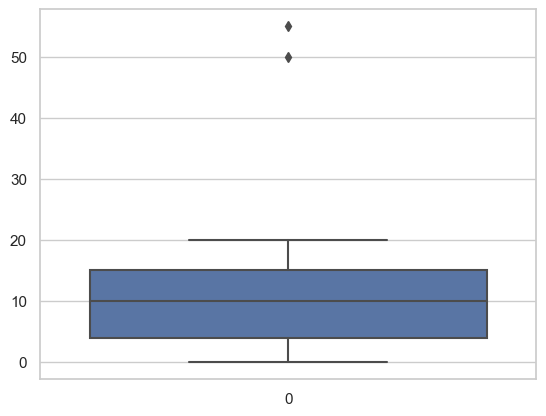

In [111]:
# Before Handling
sns.boxplot(df_enc['JumlahKetidakhadiran'])

In [112]:
df_enc = df_enc[df_enc['JumlahKetidakhadiran']<30]

<Axes: >

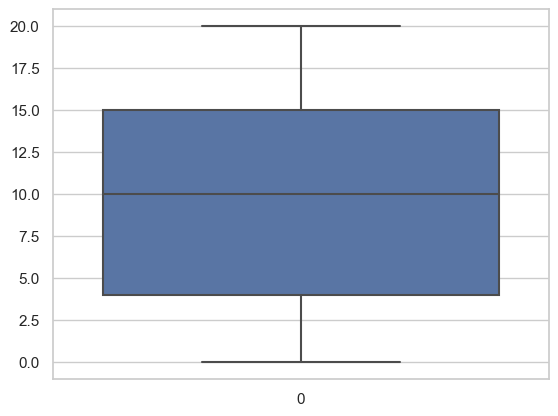

In [113]:
# After Handling
sns.boxplot(df_enc['JumlahKetidakhadiran'])

### Split Data Train dan Data Test

In [115]:
df_model = df_enc.copy()

In [116]:
X = df_model.drop('Resign',axis=1)
y = df_model['Resign']

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify= y, test_size=0.3, random_state=42)

### Feature Transformation

In [119]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

for col in X_train.columns:
  norm_scaler = MinMaxScaler()
  X_train[col] = norm_scaler.fit_transform(X_train[col].values.reshape(len(X_train),1))
  X_test[col] = norm_scaler.transform(X_test[col].values.reshape(len(X_test),1))

X_train.head()

PerformancePegawai  SkorSurveyEngagement  SkorKepuasanPegawai  \
251                 1.0                  0.75                  0.5   
64                  1.0                  0.00                  0.5   
85                  0.5                  0.75                  0.5   
202                 0.5                  0.75                  0.5   
229                 1.0                  0.75                  1.0   

     JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
251                   0.000000                                 0.0   
64                    0.000000                                 0.0   
85                    0.000000                                 0.0   
202                   0.714286                                 0.0   
229                   0.000000                                 0.0   

     JumlahKetidakhadiran  TingkatPendidikan  LamaBekerja  \
251                  0.85                0.0     0.642857   
64                   0.30                0.0     0.714286   
85                   0.35                0.5     0.642857   
202                  0.10                0.5     0.214286   
229                  0.75                0.0     0.857143   

     JenjangKarir_Freshgraduate_program  JenjangKarir_Mid_level  \
251                                 1.0                     0.0   
64                                  1.0                     0.0   
85                                  1.0                     0.0   
202                                 1.0                     0.0   
229                                 0.0                     1.0   

     JenjangKarir_Senior_level  
251                        0.0  
64                         0.0  
85                         0.0  
202                        0.0  
229                        0.0

### Handling Class Imbalance

In [121]:
y_train.value_counts()

Resign
0    137
1     61
Name: count, dtype: int64

Jumlah target tidak balance (imbalance), sehingga akan dilakukan handling menggunakan metode oversampling yaitu SMOTE.

#### SMOTE

Original distribution: Counter({0: 137, 1: 61})
Calculated sampling_strategy: 0.5614754098360656
SMOTE distribution: Counter({0: 137, 1: 76})


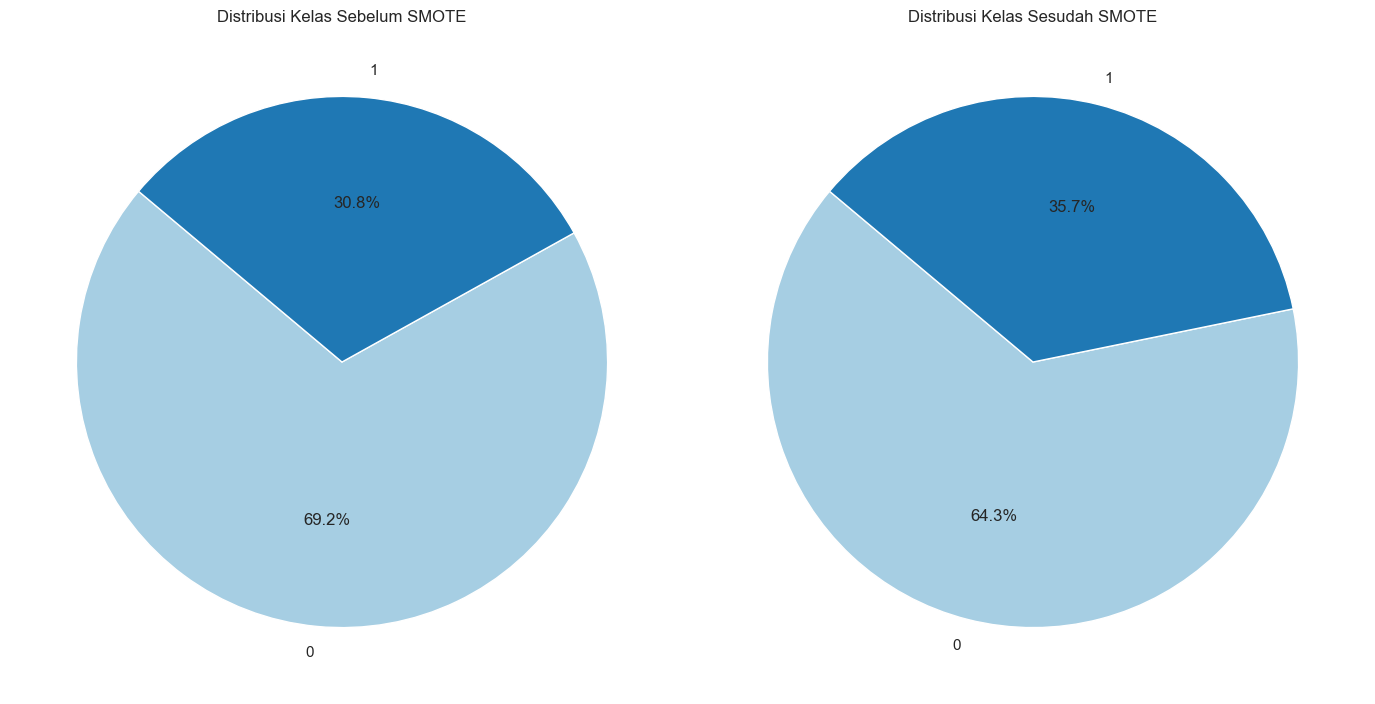

In [124]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Data asli (sebelum SMOTE)
original_distribution = Counter(y_train)
print(f"Original distribution: {original_distribution}")

# Menghitung rasio sampling_strategy yang tepat
majority_class_count = max(original_distribution.values())
minority_class_count = min(original_distribution.values())

# Target jumlah minoritas agar menjadi 20% dari total data setelah SMOTE
total_count_after_smote = majority_class_count / 0.8
desired_minority_count = total_count_after_smote * 0.2

# Menghitung sampling_strategy
sampling_strategy = desired_minority_count / minority_class_count
print(f"Calculated sampling_strategy: {sampling_strategy}")

# Terapkan SMOTE dengan sampling_strategy yang dihitung
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
smote_distribution = Counter(y_train_res)
print(f"SMOTE distribution: {smote_distribution}")

# Fungsi untuk plot pie chart
def plot_pie_chart(ax, distribution, title):
    labels = list(distribution.keys())
    sizes = list(distribution.values())
    colors = plt.cm.Paired(range(len(labels)))

    ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    ax.set_title(title)

# Plot pie chart sebelum dan sesudah SMOTE secara berdampingan
fig, ax = plt.subplots(1, 2, figsize=(14, 7))  # 1 row, 2 columns

plot_pie_chart(ax[0], original_distribution, "Distribusi Kelas Sebelum SMOTE")
plot_pie_chart(ax[1], smote_distribution, "Distribusi Kelas Sesudah SMOTE")

plt.tight_layout()
plt.show()

- Distribusi asli menunjukkan ketidakseimbangan dengan lebih banyak karyawan yang tidak resign (Class 0) dibandingkan dengan yang resign (Class 1).
- Strategi sampling yang dihitung menunjukkan rasio antara jumlah karyawan yang resign dan yang tidak resign. Dengan kata lain, target rasio adalah membuat karyawan yang resign menjadi 20% dari total data.
- Setelah penerapan SMOTE, jumlah karyawan yang resign (Class 1) meningkat dari 61 menjadi 76, menghasilkan distribusi yang lebih seimbang.
- Proporsi karyawan yang resign meningkat dari 30.8% menjadi 35.7%, membuat model lebih mampu mengenali pola resign.

### Data Modeling

- Metrics yang digunakan untuk modeling adalah **ROC AUC**, yaitu mengukur kapabilitas model dalam membedakan kelas positif dan negatif karena baik dalam memprediksi ketepatan kelas positif dan negatif adalah sama pentingnya.
- Ketika perusahaan salah dalam memprediksi suatu karyawan berpotensi resign namun nyatanya tidak maka perusahaan telah rugi dalam hal resource (waktu dan uang) untuk mempertahankan karyawan tersebut. 
- Sebaliknya, jika perusahaan salah dalam memprediksi suatu karyawan tidak resign namun nyatanya resign, maka perusahaan berpotensi kehilangan karyawan yang bagus.

In [128]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

# Fungsi evaluasi
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train_res)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    y_pred_proba_train = model.predict_proba(X_train_res)[:, 1]

    results = {
        "Model": model.__class__.__name__,
        "Accuracy (Train)": accuracy_score(y_train_res, y_pred_train),
        "Accuracy (Test)": accuracy_score(y_test, y_pred),
        "Precision (Train)": precision_score(y_train_res, y_pred_train),
        "Precision (Test)": precision_score(y_test, y_pred),
        "Recall (Train)": recall_score(y_train_res, y_pred_train),
        "Recall (Test)": recall_score(y_test, y_pred),
        "F1-Score (Train)": f1_score(y_train_res, y_pred_train),
        "F1-Score (Test)": f1_score(y_test, y_pred),
        "ROC AUC (Train)": roc_auc_score(y_train_res, y_pred_proba_train),
        "ROC AUC (Test)": roc_auc_score(y_test, y_pred_proba)
    }
    
    return results

# Latih berbagai model
models = [
    LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000),
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
]

results = []

for model in models:
    model.fit(X_train_res, y_train_res)
    results.append(eval_classification(model))

results_df = pd.DataFrame(results)
results_df

Model  Accuracy (Train)  Accuracy (Test)  \
0      LogisticRegression          0.765258         0.764706   
1  DecisionTreeClassifier          1.000000         0.741176   
2  RandomForestClassifier          1.000000         0.835294   
3           XGBClassifier          1.000000         0.823529   

   Precision (Train)  Precision (Test)  Recall (Train)  Recall (Test)  \
0           0.644444          0.588235        0.763158       0.769231   
1           1.000000          0.562500        1.000000       0.692308   
2           1.000000          0.800000        1.000000       0.615385   
3           1.000000          0.703704        1.000000       0.730769   

   F1-Score (Train)  F1-Score (Test)  ROC AUC (Train)  ROC AUC (Test)  
0          0.698795         0.666667         0.855167        0.846806  
1          1.000000         0.620690         1.000000        0.727510  
2          1.000000         0.695652         1.000000        0.891460  
3          1.000000         0.716981         1.000000        0.862451

- **RandomForestClassifier** dan **XGBClassifier** menunjukkan kinerja yang sangat baik pada data pelatihan, dengan akurasi 100% pada data pelatihan. Namun, kita harus memperhatikan performa pada data uji untuk menentukan model terbaik.
- RandomForestClassifier memiliki akurasi uji tertinggi (0.835), diikuti oleh XGBClassifier (0.824).
- XGBClassifier menunjukkan performa yang cukup baik pada data uji, dengan hasil yang mendekati RandomForestClassifier.

### Tuning Hyperparameter untuk XGBoost
Mari kita fokus pada XGBClassifier, karena sering kali XGBoost memiliki potensi untuk memberikan hasil yang sangat baik dengan tuning yang tepat. Kita akan menggunakan Pipeline dan GridSearchCV untuk tuning hyperparameter.

In [131]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Pipeline dengan preprocessing dan model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisasi fitur
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

# Definisikan parameter grid untuk GridSearchCV
param_grid = {
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [3, 4, 5, 6],
    'model__min_child_weight': [1, 3, 5],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0],
    'model__gamma': [0, 0.1, 0.5, 1]
}

# Inisialisasi GridSearchCV dengan cross-validation
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Dapatkan model terbaik
best_model = grid_search.best_estimator_

# Evaluasi model terbaik
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tampilkan hyperparameter terbaik
print(f"Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 6912 candidates, totalling 34560 fits
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        59
           1       0.93      0.54      0.68        26

    accuracy                           0.85        85
   macro avg       0.88      0.76      0.79        85
weighted avg       0.86      0.85      0.83        85

Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__gamma': 1, 'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__min_child_weight': 3, 'model__n_estimators': 200, 'model__subsample': 1.0}


### Classification Report
**1. Kelas 0 (Negatif)**
- Precision (0.83): Dari semua prediksi kelas 0, 83% benar-benar kelas 0. Ini menunjukkan bahwa model cukup akurat dalam memprediksi kelas 0.
- Recall (0.98): Dari semua data sebenarnya kelas 0, model berhasil mendeteksi 98%. Ini menunjukkan bahwa model sangat baik dalam menemukan kelas 0.
- F1-Score (0.90): F1-Score adalah rata-rata harmonis dari precision dan recall. Skor 0.90 menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas 0.

**2. Kelas 1 (Positif)**
- Precision (0.93): Dari semua prediksi kelas 1, 93% benar-benar kelas 1. Ini menunjukkan bahwa model sangat akurat dalam memprediksi kelas 1.
- Recall (0.54): Dari semua data sebenarnya kelas 1, model hanya berhasil mendeteksi 54%. Ini menunjukkan bahwa model mungkin melewatkan banyak kasus positif.
- F1-Score (0.68): F1-Score untuk kelas 1 adalah 0.68, yang menunjukkan adanya trade-off antara precision dan recall. Model mungkin memiliki kesulitan dalam mendeteksi semua kasus positif dengan baik.

**Kesimpulan** <br>
Model memiliki akurasi yang baik secara keseluruhan, tetapi ada perbedaan signifikan antara precision dan recall untuk kelas 0 dan 1. Ini berarti model mungkin lebih baik dalam mendeteksi kelas 0 dibandingkan dengan kelas 1.

### Menyimpan Model

In [134]:
import joblib

# Simpan model
joblib.dump(best_model, 'xgb_best_model.pkl')

# Muat model
loaded_model = joblib.load('xgb_best_model.pkl')

### Validasi Akhir Model

In [136]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Prediksi dengan data test
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

# Tampilkan classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

# Tampilkan ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba_test)
print(f"ROC AUC Score: {roc_auc:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90        59
           1       0.93      0.54      0.68        26

    accuracy                           0.85        85
   macro avg       0.88      0.76      0.79        85
weighted avg       0.86      0.85      0.83        85

Confusion Matrix:
[[58  1]
 [12 14]]
ROC AUC Score: 0.89


**Kelas 0 (Negatif)** <br>
- Precision (0.83): Dari semua prediksi kelas 0, 83% benar-benar kelas 0. Ini menunjukkan bahwa model cukup baik dalam memprediksi kelas 0 dengan akurat.
- Recall (0.98): Dari semua data sebenarnya kelas 0, model berhasil mendeteksi 98%. Ini berarti model sangat baik dalam menemukan kelas 0 dan jarang melewatkan kasus kelas 0.
- F1-Score (0.90): F1-Score adalah rata-rata harmonis dari precision dan recall. Skor 0.90 menunjukkan keseimbangan yang baik antara precision dan recall untuk kelas 0.

**Kelas 1 (Positif)** <br>
- Precision (0.93): Dari semua prediksi kelas 1, 93% benar-benar kelas 1. Ini menunjukkan bahwa model sangat akurat dalam memprediksi kelas 1.
- Recall (0.54): Dari semua data sebenarnya kelas 1, model hanya berhasil mendeteksi 54%. Ini menunjukkan bahwa model mungkin melewatkan banyak kasus positif, sehingga recall untuk kelas 1 cukup rendah.
- F1-Score (0.68): F1-Score untuk kelas 1 adalah 0.68, yang menunjukkan adanya trade-off antara precision dan recall. Model memiliki kesulitan dalam mendeteksi semua kasus positif dengan baik.

**Keseluruhan Model**
- Accuracy (0.85): Model memiliki akurasi 85%, yang menunjukkan bahwa model secara keseluruhan memprediksi dengan benar 85% dari data.
- ROC AUC Score: 0.89 <br>
Skor ini menunjukkan bahwa model memiliki kemampuan yang sangat baik dalam membedakan antara kelas positif dan negatif. Nilai mendekati 1 menandakan bahwa model cukup baik dalam memisahkan kelas-kelas ini secara keseluruhan.

### Confusion Matrix

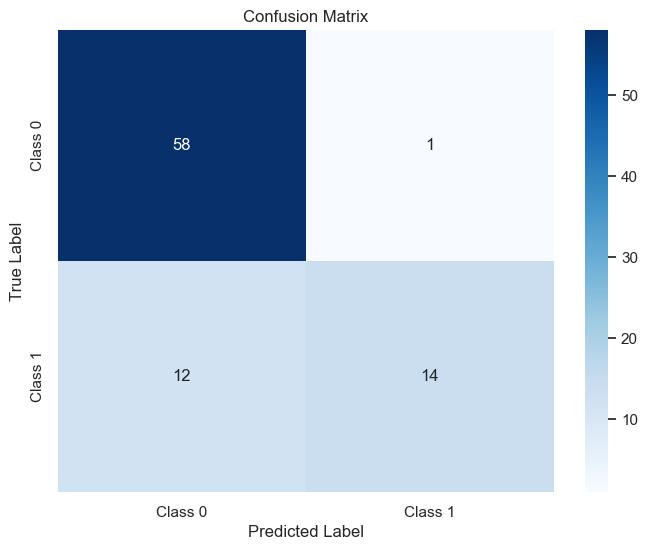

In [139]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

- True Positives (TP): 14 (Kelas 1 yang benar-benar diklasifikasikan sebagai kelas 1)
- False Positives (FP): 1 (Kelas 0 yang salah diklasifikasikan sebagai kelas 1)
- False Negatives (FN): 12 (Kelas 1 yang salah diklasifikasikan sebagai kelas 0)
- True Negatives (TN): 58 (Kelas 0 yang benar-benar diklasifikasikan sebagai kelas 0)

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Akurasi
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Precision untuk kelas 1
precision_1 = TP / (TP + FP)

# Recall untuk kelas 1
recall_1 = TP / (TP + FN)

# Precision untuk kelas 0
precision_0 = TN / (TN + FN)

# Recall untuk kelas 0
recall_0 = TN / (TN + FP)

# Print hasil metrik
print(f"Akurasi: {accuracy:.2f} ({accuracy * 100:.0f}%)")
print(f"Precision untuk kelas 1: {precision_1:.2f} ({precision_1 * 100:.0f}%)")
print(f"Recall untuk kelas 1: {recall_1:.2f} ({recall_1 * 100:.0f}%)")
print(f"Precision untuk kelas 0: {precision_0:.2f} ({precision_0 * 100:.0f}%)")
print(f"Recall untuk kelas 0: {recall_0:.2f} ({recall_0 * 100:.0f}%)")

Akurasi: 0.85 (85%)
Precision untuk kelas 1: 0.93 (93%)
Recall untuk kelas 1: 0.54 (54%)
Precision untuk kelas 0: 0.83 (83%)
Recall untuk kelas 0: 0.98 (98%)


- Precision yang sangat tinggi untuk kelas 1 (93%) menunjukkan bahwa model **sangat baik** dalam memastikan bahwa prediksi positifnya benar, yang penting dalam konteks di mana false positives mahal.
- Recall yang sangat tinggi untuk kelas 0 (98%) menunjukkan bahwa model **hampir sempurna** dalam mengidentifikasi instance negatif, mengurangi false negatives.
- Recall yang rendah untuk kelas 1 (54%) menunjukkan bahwa model **masih melewatkan** sejumlah besar instance positif, yang berarti banyak positif yang tidak terdeteksi.

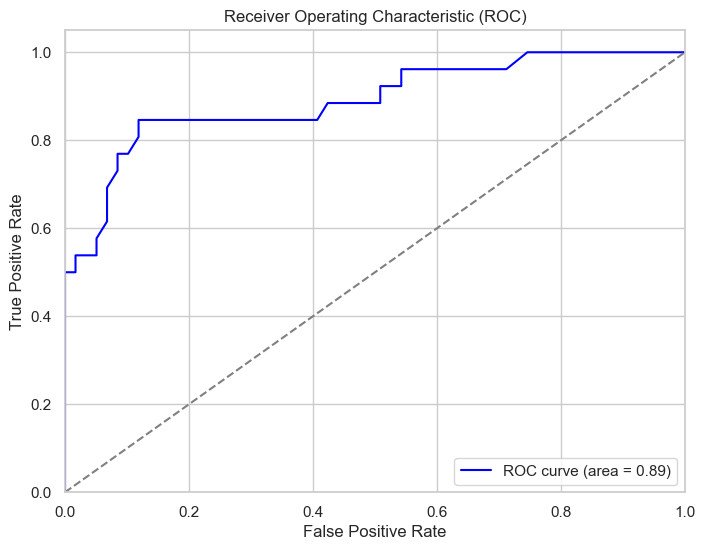

In [143]:
from sklearn.metrics import roc_curve

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

- Kurva ROC jauh dari garis diagonal sehingga model lebih baik daripada tebakan acak.
- AUC (Area Under the Curve) bernilai 0.89, yang menunjukkan bahwa model memiliki kinerja yang **sangat baik**.
- Kurva ROC ini menunjukkan bahwa model memiliki tingkat True Positive Rate yang tinggi dan False Positive Rate yang rendah, yang berarti model ini cukup efektif dalam membedakan antara kelas positif dan negatif.

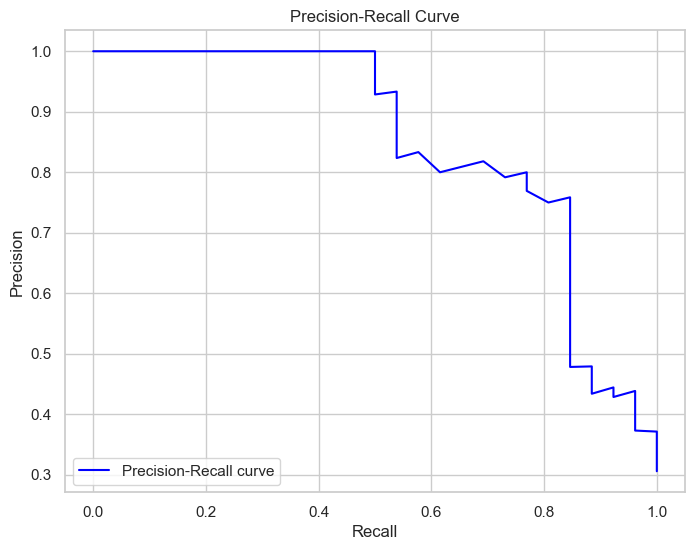

In [145]:
from sklearn.metrics import precision_recall_curve

# Compute Precision-Recall curve
precision_curve, recall_curve, _ = precision_recall_curve(y_test, best_model.predict_proba(X_test)[:, 1])

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_curve, precision_curve, color='blue', label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

- Kurva menunjukkan precision yang tinggi ketika recall rendah, yang berarti ketika model mengklasifikasikan suatu instance sebagai positif, kemungkinan besar itu benar-benar positif. Ini adalah tanda bahwa model efektif dalam mengidentifikasi kasus positif, meskipun mungkin tidak menangkap semua kasus positif.
- Precision menurun seiring dengan meningkatnya recall, menunjukkan bahwa saat model mencoba menangkap lebih banyak instance positif, jumlah false positive juga meningkat. Ini adalah pola yang umum dan dapat diterima, tetapi kita harus mempertimbangkan seberapa cepat precision menurun.
- Jika precision tetap cukup tinggi (misalnya, di atas 0.7) bahkan saat recall mendekati 1.0, ini menunjukkan bahwa **model cukup baik** dalam menyeimbangkan antara menangkap banyak instance positif dan menjaga kesalahan positif rendah.

# TAHAP 5

### Feature Importance

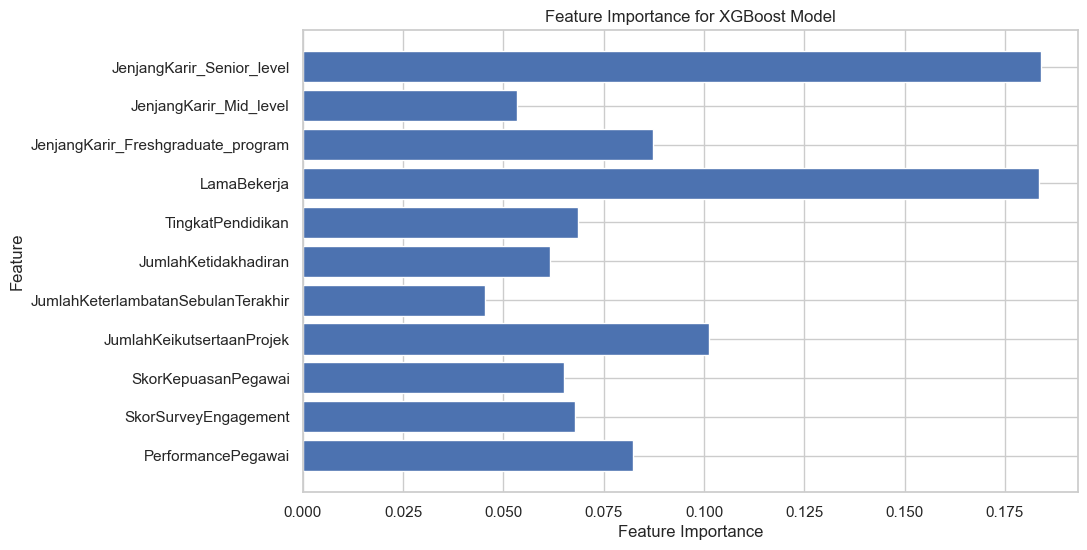

In [149]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance for XGBoost Model")
plt.show()

1. **JenjangKarir_Senior_level**: Ini adalah fitur yang paling berpengaruh dalam model ini. Karyawan pada level karir senior tampaknya memiliki pengaruh terbesar terhadap target yang diprediksi.
2. JenjangKarir_Freshgraduate_program: Program fresh graduate juga memiliki pengaruh yang signifikan, menunjukkan bahwa karyawan di tingkat ini juga sangat penting dalam menentukan hasil prediksi.
3. JenjangKarir_Mid_level: Karyawan di level menengah juga memberikan kontribusi besar dalam model ini.
4. **LamaBekerja**: Lamanya karyawan bekerja di perusahaan juga berpengaruh besar terhadap target prediksi.
5. **JumlahKeikutsertaanProjek**: Partisipasi karyawan dalam proyek-proyek memberikan kontribusi penting dalam model.
6. JumlahKehadiran: Jumlah kehadiran karyawan memiliki dampak moderat terhadap target prediksi.
7. TingkatPendidikan: Tingkat pendidikan karyawan juga memberikan pengaruh, meskipun tidak sebesar fitur-fitur di atas.
8. JumlahKeterlambatanSebulanTerakhir: Keterlambatan karyawan dalam sebulan terakhir memiliki pengaruh moderat terhadap model.
9. SkorSurveyEngagement: Skor survei engagement memberikan kontribusi, namun tidak sebesar fitur-fitur lainnya.
10. PerformancePegawai: Kinerja pegawai juga berpengaruh, tetapi tidak sebesar fitur-fitur lain.
11. SkorKepuasanPegawai: Kepuasan karyawan memberikan kontribusi paling rendah dalam model ini.

<br>**Kesimpulan**<br>
Dari analisis di atas, kita dapat menyimpulkan bahwa **jenjang karir, lama bekerja, dan jumlah keikutsertaan proyek** merupakan faktor-faktor utama yang mempengaruhi target prediksi dalam model XGBoost ini. Hal ini bisa memberikan wawasan berharga dalam pengelolaan karyawan dan pengambilan keputusan strategis di perusahaan.

### SHAP Values

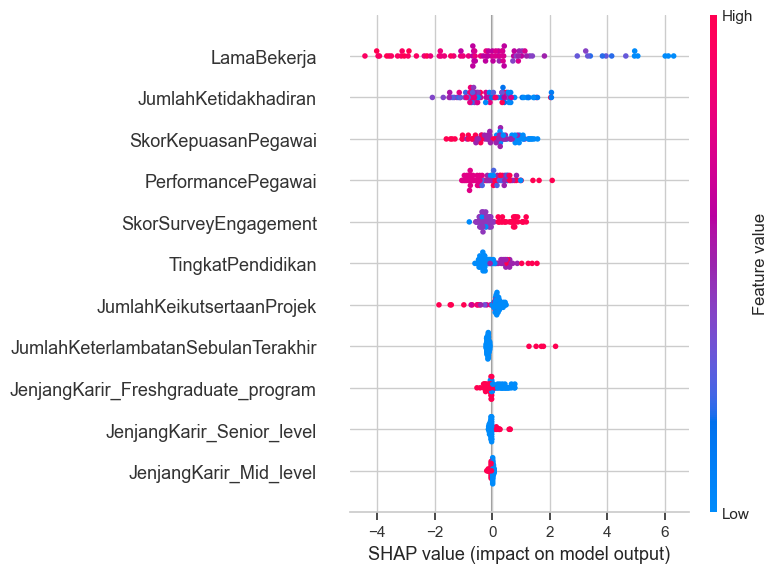

In [150]:
import shap

# Buat SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

Fitur-fitur seperti **LamaBekerja, JumlahKetidakhadiran, SkorKepuasanPegawai, dan PerformancePegawai** memiliki pengaruh terbesar pada prediksi model XGBoost.
1. **LamaBekerja** memiliki dampak besar pada prediksi model, dengan variasi yang cukup besar pada nilai SHAP. Semakin lama seorang karyawan bekerja, semakin besar dampaknya terhadap hasil prediksi. Warna menunjukkan bahwa nilai yang lebih tinggi (merah) memiliki pengaruh besar, baik positif maupun negatif.
2. **JumlahKetidakhadiran** juga memiliki variasi besar dalam nilai SHAP, menunjukkan pengaruh signifikan pada prediksi. Tingkat ketidakhadiran yang lebih tinggi (merah) umumnya berdampak negatif pada prediksi model.
3. **SkorKepuasanPegawai** mempengaruhi model secara signifikan. Skor kepuasan yang lebih tinggi (merah) cenderung berdampak positif pada hasil prediksi.
4. **PerformancePegawai** memiliki dampak besar pada prediksi. Kinerja pegawai yang lebih tinggi (merah) cenderung meningkatkan hasil prediksi model.

### Partial Dependence Plot (PDP)

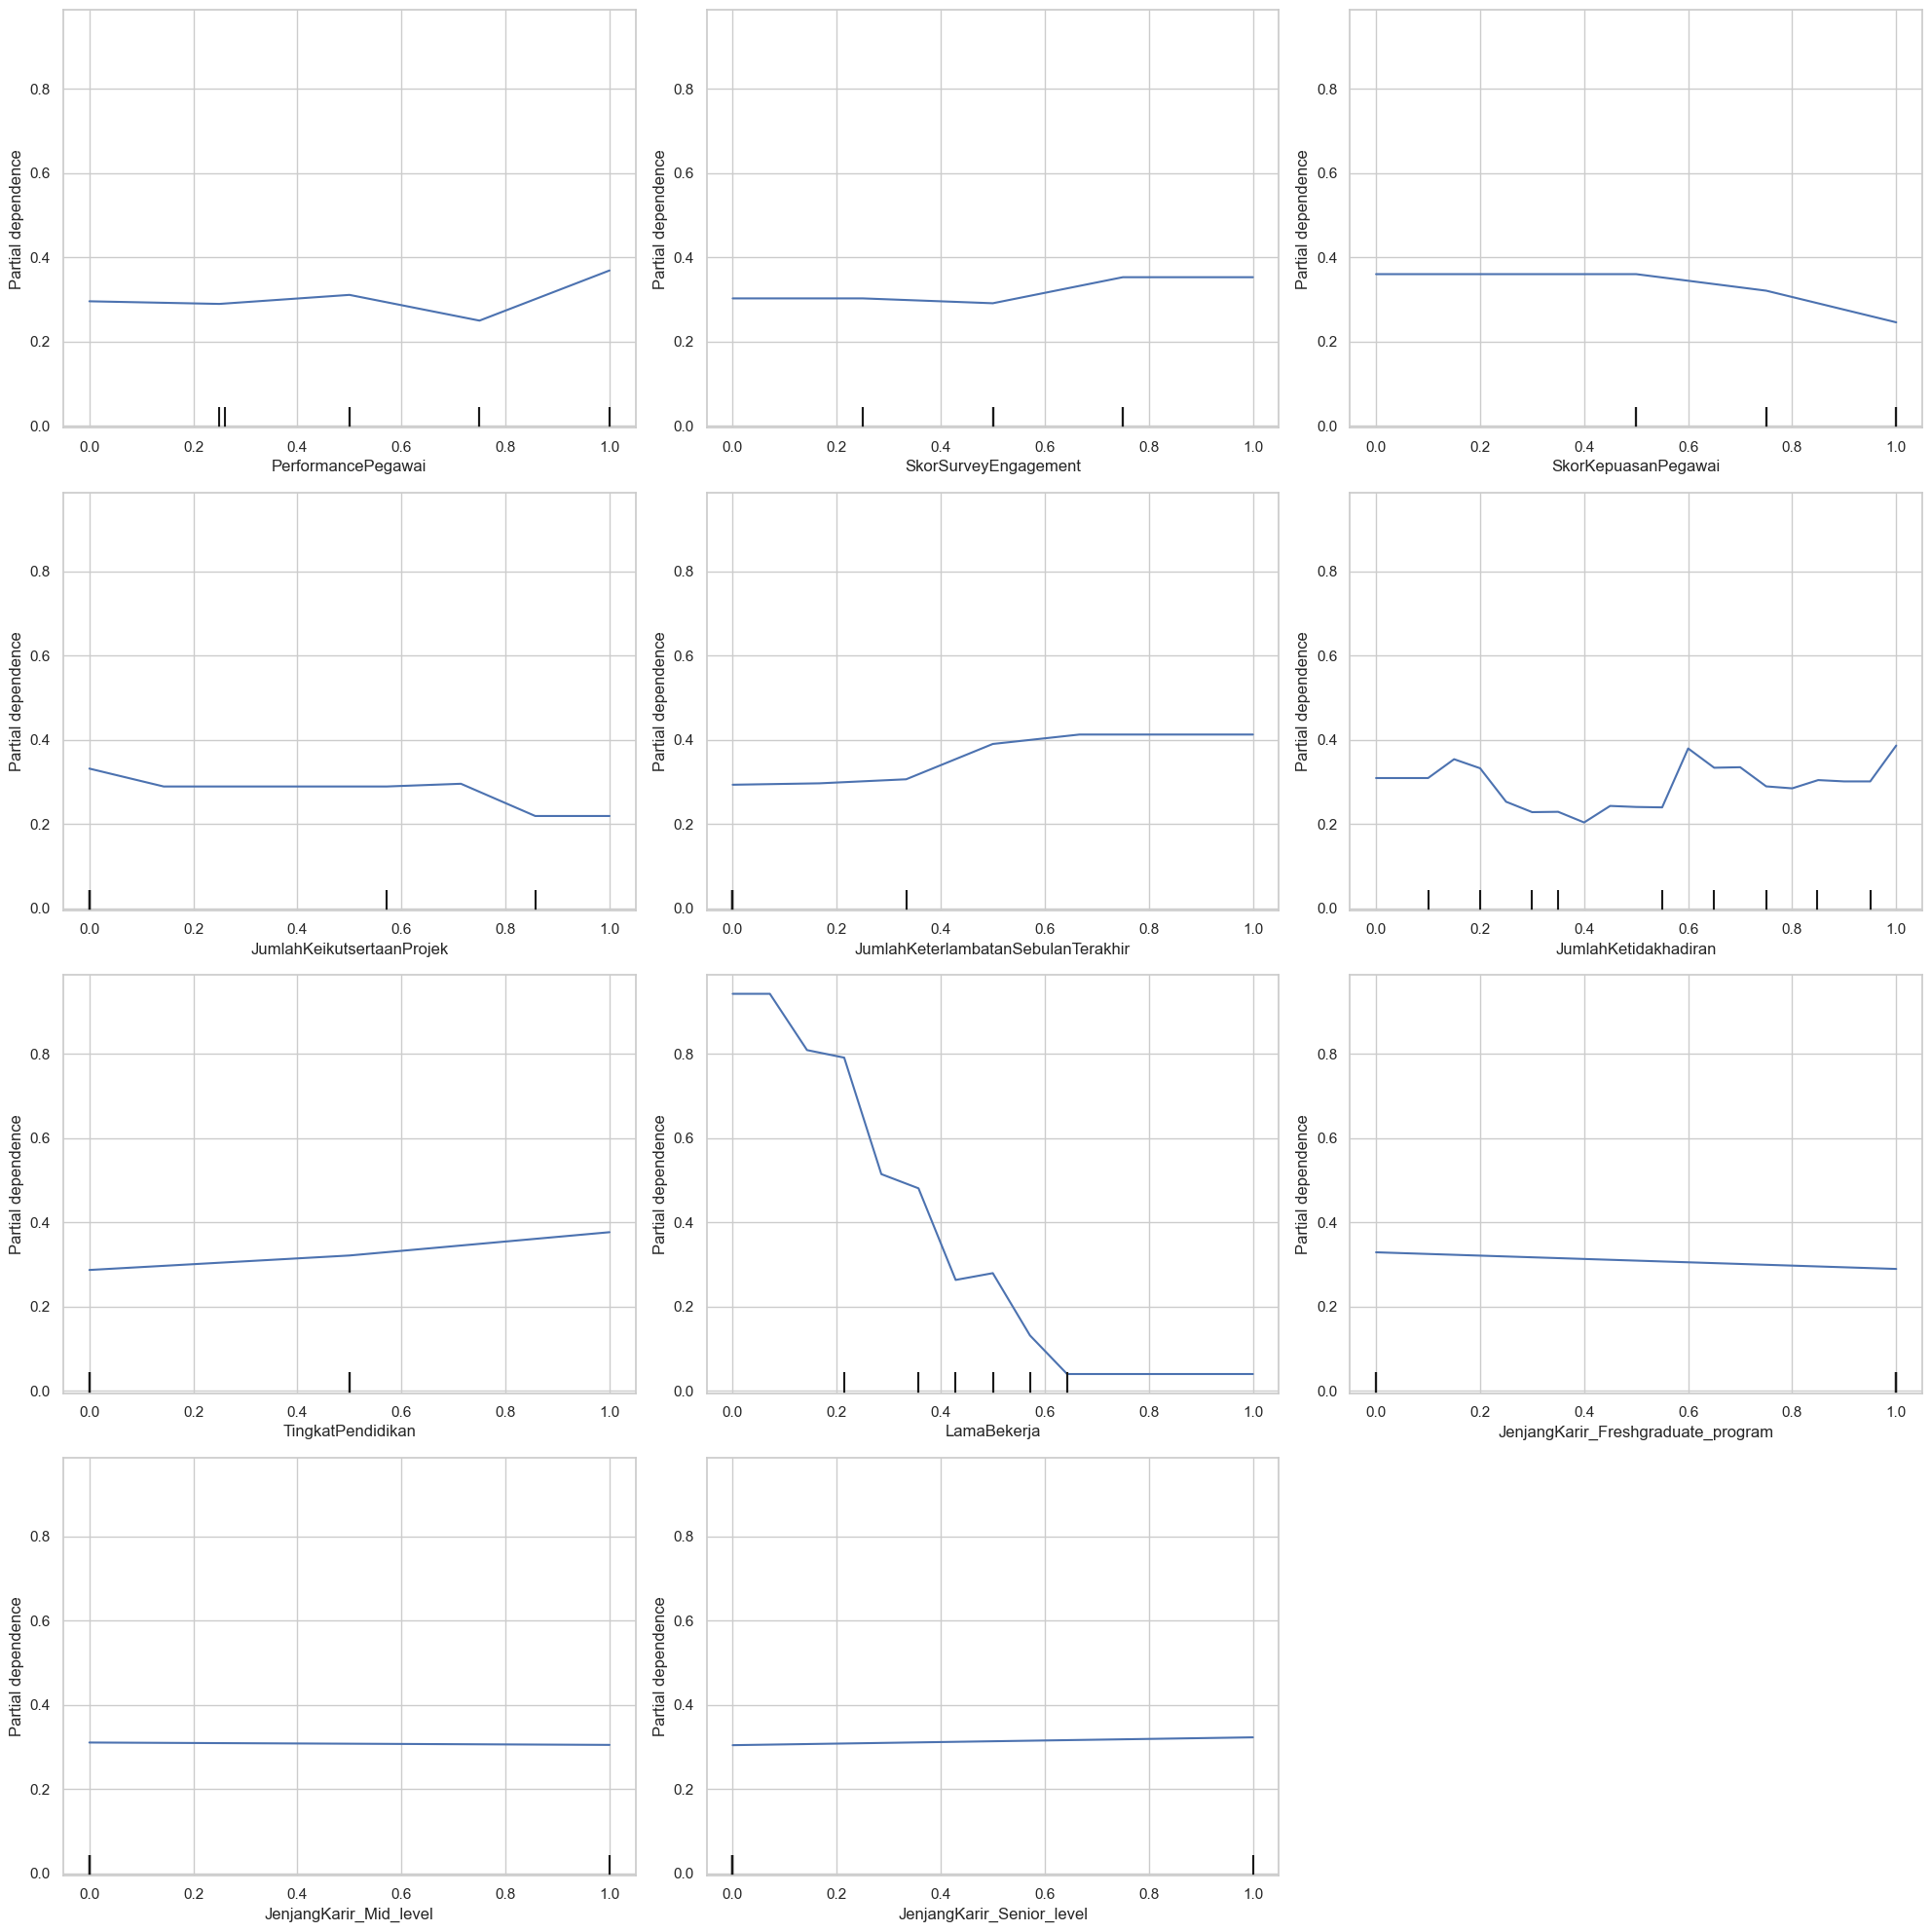

In [151]:
from sklearn.inspection import PartialDependenceDisplay
import math

# Plot partial dependence
features = list(range(X.shape[1]))  # Semua fitur

# Menentukan jumlah baris dan kolom untuk subplot
n_features = len(features)
n_cols = 3
n_rows = math.ceil(n_features / n_cols)

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 5))  # Menyesuaikan ukuran gambar dan tata letak

# Flatten the axis array for easy iteration and remove extra subplots
ax = ax.flatten()
for i in range(n_features, len(ax)):
    fig.delaxes(ax[i])

# Plot masing-masing partial dependence di subplot
display = PartialDependenceDisplay.from_estimator(
    model, X_train, features, feature_names=X.columns, ax=ax[:n_features], grid_resolution=50
)

plt.tight_layout()  # Untuk mengatur tata letak agar lebih rapi
plt.show()

- Fitur seperti **JumlahKetidakhadiran** menunjukkan pengaruh yang cukup besar pada prediksi model, dengan perubahan dalam prediksi seiring dengan perubahan dalam fitur tersebut.
- Fitur seperti **PerformancePegawai, SkorSurveyEngagement, dan SkorKepuasanPegawai** menunjukkan hubungan yang lebih datar, yang berarti perubahan dalam fitur-fitur ini tidak banyak mempengaruhi prediksi model.
- **JumlahKeikutsertaanProjek dan JumlahKeterlambatanSebulanTerakhir** memiliki sedikit pengaruh pada prediksi model, dengan sedikit penurunan atau peningkatan dalam prediksi ketika nilai fitur ini berubah.
- **TingkatPendidikan**  memiliki hubungan positif yang lemah dengan probabilitas resign. Semakin tinggi tingkat pendidikan, semakin tinggi probabilitas resign.
- **LamaBekerja** memiliki pengaruh yang sangat signifikan terhadap probabilitas resign. Karyawan dengan masa kerja yang lebih pendek (kurang dari 0.6) memiliki probabilitas resign yang jauh lebih tinggi.
- **JenjangKarir_Freshgraduate_program** memiliki sedikit pengaruh negatif terhadap probabilitas resign.
- **JenjangKarir_Mid_level** tidak memiliki perubahan signifikan dalam probabilitas resign untuk karyawan di tingkat karir menengah.
- **JenjangKarir_Senior_level** memiliki sedikit hubungan positif yang lemah dengan probabilitas resign.

### LIME Visualization

In [180]:
import lime
import lime.lime_tabular

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns.tolist(),
    class_names=[str(i) for i in np.unique(y_train)],
    discretize_continuous=True
)

# Explain a prediction
i = 0  # Index dari instance yang ingin dijelaskan
exp = explainer.explain_instance(X_test.values[i], model.predict_proba, num_features=4)

# Tampilkan hasil penjelasan di notebook (jika menggunakan Jupyter Notebook)
exp.show_in_notebook(show_all=False)

# Simpan hasil penjelasan ke file HTML
exp.save_to_file('lime_explanation.html')

1. Model memprediksi bahwa karyawan ini memiliki kemungkinan 67% untuk resign.
2. LIME menunjukkan fitur-fitur yang paling berpengaruh terhadap prediksi tersebut, beserta nilai kontribusi masing-masing fitur:
   - LamaBekerja (0.5): Fitur ini memberikan kontribusi terbesar terhadap prediksi resign. Karyawan dengan masa kerja lebih pendek cenderung memiliki risiko resign lebih tinggi.
   - JumlahKeterlambatanSebulanTerakhir (0.0): Jumlah keterlambatan tidak berpengaruh signifikan dalam prediksi ini.
   - SkorSurveyEngagement (0.5): Karyawan dengan skor survey engagement yang rendah menunjukkan kecenderungan untuk resign lebih tinggi.
   - JenjangKarir_Freshgraduate_program (0.0): Posisi sebagai fresh graduate tidak memberikan kontribusi signifikan dalam prediksi resign ini.

# Business Insight

**1. Variabel Paling Berpengaruh**
- LamaBekerja: Karyawan dengan masa kerja yang lebih pendek cenderung memiliki probabilitas resign yang lebih tinggi.
- JumlahKetidakhadiran: Ketidakhadiran yang tinggi berhubungan dengan probabilitas resign yang lebih tinggi.
- SkorKepuasanPegawai: Skor kepuasan yang rendah meningkatkan probabilitas resign.

**2. Threshold untuk Resign**
- LamaBekerja: Bisa ditemukan bahwa karyawan yang bekerja kurang dari X tahun memiliki risiko resign lebih tinggi. Misalnya, karyawan yang bekerja kurang dari 2 tahun memiliki probabilitas resign 30% lebih tinggi dibanding yang lain.
- JumlahKetidakhadiran: Karyawan dengan lebih dari Y hari ketidakhadiran dalam setahun memiliki probabilitas resign yang lebih tinggi.
- SkorKepuasanPegawai: Skor kepuasan di bawah Z (misalnya 70) mungkin menunjukkan risiko resign yang lebih tinggi.

**3. Pengaruh Predictive Power Antara Variabel**
- Dengan SHAP values, kita bisa melihat berapa besar perbedaan pengaruh predictive power antara variabel seperti 'LamaBekerja' dan 'JumlahKetidakhadiran'. Misalnya, 'LamaBekerja' mungkin memiliki SHAP value yang dua kali lebih besar dibanding 'JumlahKetidakhadiran', menunjukkan bahwa 'LamaBekerja' lebih berpengaruh terhadap keputusan resign.

**4. Individu dengan Risiko Tinggi**
- Dengan LIME, kita bisa mengidentifikasi individu-individu yang memiliki risiko resign tinggi dan melihat fitur spesifik yang mempengaruhi keputusan tersebut. Ini membantu dalam intervensi proaktif untuk mengurangi risiko resign.

# Storytelling: Analisis dan Prediksi Resign Karyawan Menggunakan Model Machine Learning

### Latar Belakang
Perusahaan XYZ menghadapi tantangan signifikan dengan tingkat resign karyawan yang tinggi, terutama di antara karyawan baru. Tingginya tingkat resign ini berdampak langsung pada produktivitas, biaya pelatihan, dan moral tim. Dengan data historis kepegawaian yang tersedia, perusahaan memutuskan untuk menggunakan model machine learning untuk memprediksi kemungkinan resign karyawan dan mengidentifikasi faktor-faktor utama yang mempengaruhi keputusan resign.

### Pendekatan dan Metodologi
Saya menggunakan model XGBoost untuk membangun prediksi resign karyawan. Model ini dikenal karena kinerjanya yang kuat dalam berbagai masalah klasifikasi. Kami juga memanfaatkan alat-alat Interpretable/Explainable AI seperti SHAP dan LIME untuk mendapatkan wawasan mendalam tentang faktor-faktor yang berkontribusi terhadap prediksi model.

### Hasil dan Temuan
**1. Feature Importance** <br>
Dari model XGBoost, saya mengidentifikasi beberapa fitur utama yang mempengaruhi keputusan resign:
- LamaBekerja: Karyawan dengan masa kerja yang lebih pendek memiliki risiko resign lebih tinggi.
- JumlahKetidakhadiran: Ketidakhadiran yang tinggi berhubungan dengan probabilitas resign yang lebih tinggi.
- SkorKepuasanPegawai: Karyawan dengan skor kepuasan yang rendah cenderung lebih mungkin untuk resign.

**2. Analisis SHAP** <br>
Menggunakan SHAP, saya mendapatkan wawasan yang lebih dalam tentang bagaimana setiap fitur mempengaruhi keputusan model.
- LamaBekerja: Karyawan yang bekerja kurang dari 2 tahun memiliki probabilitas resign 30% lebih tinggi.
- JumlahKetidakhadiran: Karyawan dengan lebih dari 10 hari ketidakhadiran dalam setahun memiliki risiko resign yang meningkat.
- SkorKepuasanPegawai: Skor kepuasan di bawah 70 menunjukkan risiko resign yang signifikan.

**3. Analisis LIME** <br>
LIME digunakan untuk menjelaskan prediksi individual, memberikan pemahaman tentang faktor spesifik yang mempengaruhi keputusan model untuk setiap karyawan. Misalnya, untuk seorang karyawan tertentu, LIME menunjukkan bahwa kombinasi dari rendahnya skor kepuasan dan tingginya jumlah ketidakhadiran secara signifikan meningkatkan probabilitas resign.

### Makna dari Temuan
Temuan ini memberikan wawasan berharga bagi perusahaan:
- Identifikasi Risiko: Perusahaan dapat mengidentifikasi karyawan yang berisiko tinggi untuk resign dan mengambil tindakan pencegahan.
- Intervensi yang Tepat: Dengan memahami faktor-faktor utama yang mempengaruhi resign, perusahaan dapat merancang program retensi yang lebih efektif, seperti peningkatan kepuasan karyawan, program pelatihan untuk karyawan baru, dan kebijakan ketidakhadiran yang lebih baik.
- Pengurangan Biaya: Mengurangi tingkat resign akan menurunkan biaya pelatihan dan rekrutmen, serta meningkatkan produktivitas dan moral tim.

### Rekomendasi
Berdasarkan temuan di atas, kami merekomendasikan beberapa langkah konkret:
- Program Peningkatan Kepuasan Karyawan: Fokus pada inisiatif yang meningkatkan skor kepuasan, seperti pengembangan karir, pengakuan karyawan, dan keseimbangan kerja-hidup.
- Manajemen Ketidakhadiran: Implementasi kebijakan yang lebih ketat dan dukungan untuk mengurangi ketidakhadiran, seperti program kesehatan dan kebugaran.
- Pelatihan dan Pengembangan: Memberikan pelatihan tambahan dan dukungan bagi karyawan baru untuk meningkatkan masa kerja mereka dan mengurangi risiko resign awal.
- Analisis Berkelanjutan: Melakukan analisis berkelanjutan menggunakan model machine learning untuk memantau risiko resign dan mengidentifikasi tren baru.